In [ ]:
#From Filipe's permutation_plots.R script
#Too much memory to do all 100, but trying with just 10 seeds of permutations for now, to have something...

In [1]:
ls()    

[1] "a_frags"                                
 [2] "b_frags"                                
 [3] "dataDir"                                
 [4] "direct_ints"                            
 [5] "exp_prob_aa"                            
 [6] "exp_prob_ab"                            
 [7] "exp_prob_ba"                            
 [8] "exp_prob_bb"                            
 [9] "exp_probs"                              
[10] "exp_probs_tb"                           
[11] "fig3d"                                  
[12] "fig3e"                                  
[13] "fig3ea"                                 
[14] "fig3f"                                  
[15] "fig3fa"                                 
[16] "i"                                      
[17] "info_per_step_by_dataset"               
[18] "intraFrac"                              
[19] "intraFrac_Split"                        
[20] "intraFrac_Split2"                       
[21] "intraFrac2"                             
[22] "new_fig3b"                              
[23] "observed_probs"                         
[24] "outDataDir"                             
[25] "p"                                      
[26] "p1"                                     
[27] "p2"                                     
[28] "R1env"                                  
[29] "R2env"                                  
[30] "steps_per_frag_sumarized"               
[31] "supp.labs"                              
[32] "total_frags"                            
[33] "unique_frags_per_comp_type"             
[34] "walks_just_two_distinct_compartments"   
[35] "walks_two_or_more_distinct_compartments"
[36] "walks_with_one_or_more_interchr_steps"

In [2]:
rm(list=ls())

In [3]:
ls()

character(0)

In [4]:
library(tidyverse)
library(GenomicRanges)
library(rtracklayer)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:

In [5]:
# Load the frames done in advance that are in a good structure for plotting

In [6]:
walkDir = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/walks"
outDataDir = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures"

In [7]:
load(file.path(walkDir, "210204_exp4.30_AllSamples_frames_for_plotting_stricter_stranded_AllChromEigs.RData"), R1env <- new.env())
load(file.path(walkDir, "210204_exp4.39_AllSamples_frames_for_plotting_stricter_stranded_AllChromEigs.RData"), R2env <- new.env())

In [8]:
steps_per_frag_sumarized = dplyr::bind_rows(R1env$steps_per_frag_sumarized, R2env$steps_per_frag_sumarized)
direct_ints = dplyr::bind_rows(R1env$direct_ints, R2env$direct_ints)

In [47]:
ls(R1env)

[1] "direct_ints"                   "direct_ints_split"            
 [3] "hic_compartments"              "info_per_step"                
 [5] "info_per_step_by_treatment"    "info_per_step_per_class"      
 [7] "pairwise_cis_distances"        "pairwise_intrachr"            
 [9] "size_restriction"              "size_restriction_by_treatment"
[11] "spacings_frame"                "steps_per_frag_sumarized"

In [49]:
head(R1env$info_per_step)

size,state,dataset,treatment,biorep,steps,intra_chromosome,fraction_cis_hops,fraction_one_compartment_type,fraction_same_compartment_ints,full_dataset_ID
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,1,0.8085074,0.8085074,0.6813575,0.7034705,anaphase all TI_MC3C_Dpn_t2_4_30
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,2,0.8114246,0.8771507,0.5323469,0.7087061,anaphase all TI_MC3C_Dpn_t2_4_30
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,3,0.7682093,0.8866758,0.4133958,0.7030528,anaphase all TI_MC3C_Dpn_t2_4_30
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,4,0.7411143,0.8940922,0.3167627,0.6920029,anaphase all TI_MC3C_Dpn_t2_4_30
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,5,0.6901771,0.8933977,0.2798712,0.6930113,anaphase all TI_MC3C_Dpn_t2_4_30
all,anaphase,TI_MC3C_Dpn_t2_4_30,t2,R1,6,0.6520112,0.8950733,0.2207671,0.6877144,anaphase all TI_MC3C_Dpn_t2_4_30


In [54]:
# Get the number of intra-chromosomal walks and fraction of cis steps for the real walks
# Create object just with walks that are of class 2 and have one or more inter-chromosomal interaction
walks_with_one_or_more_interchr_steps <- steps_per_frag_sumarized %>%
  ungroup() %>%
  filter(class == 2, inter_chr >= 1)

info_per_step_by_dataset <- steps_per_frag_sumarized %>%
  filter(class == 2, pacbio_frag_ID %in% walks_with_one_or_more_interchr_steps$pacbio_frag_ID) %>%
  group_by(treatment, biorep, steps, dataset) %>%
  summarize(intra_chromosome = sum(num_chr == 1)/length(num_chr),
            fraction_cis_hops = 1 - (sum(inter_chr)/sum(steps)), .groups = 'keep')

In [10]:
permuteDir = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/permutated_direct_ints"
permutation_permutated_files <- list.files(file.path(permuteDir, "permutated_frames"), 
                                           pattern = "*AllChromEigs*")

In [11]:
permutation_permutated_files

[1] "permutated_frames_exp4.30_AllChromEigs_20201221.RData"
 [2] "permutated_frames_exp4.30_AllChromEigs_20201222.RData"
 [3] "permutated_frames_exp4.30_AllChromEigs_20201223.RData"
 [4] "permutated_frames_exp4.30_AllChromEigs_20201224.RData"
 [5] "permutated_frames_exp4.30_AllChromEigs_20201225.RData"
 [6] "permutated_frames_exp4.30_AllChromEigs_20201226.RData"
 [7] "permutated_frames_exp4.30_AllChromEigs_20201227.RData"
 [8] "permutated_frames_exp4.30_AllChromEigs_20201228.RData"
 [9] "permutated_frames_exp4.30_AllChromEigs_20201229.RData"
[10] "permutated_frames_exp4.30_AllChromEigs_20201230.RData"
[11] "permutated_frames_exp4.30_AllChromEigs_20201231.RData"
[12] "permutated_frames_exp4.39_AllChromEigs_20201221.RData"
[13] "permutated_frames_exp4.39_AllChromEigs_20201222.RData"
[14] "permutated_frames_exp4.39_AllChromEigs_20201223.RData"
[15] "permutated_frames_exp4.39_AllChromEigs_20201224.RData"
[16] "permutated_frames_exp4.39_AllChromEigs_20201225.RData"
[17] "permutated_frames_exp4.39_AllChromEigs_20201226.RData"
[18] "permutated_frames_exp4.39_AllChromEigs_20201227.RData"
[19] "permutated_frames_exp4.39_AllChromEigs_20201228.RData"
[20] "permutated_frames_exp4.39_AllChromEigs_20201229.RData"
[21] "permutated_frames_exp4.39_AllChromEigs_20201230.RData"
[22] "permutated_frames_exp4.39_AllChromEigs_20201231.RData"

In [12]:
permutated_frame <- data_frame()

permutated_steps_per_frag <- data_frame()

permutated_spacings <- data_frame()

permutated_max_span_by_chr <- data_frame()

permutated_class_1_ranges_list <- list()

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [13]:
for (permutated_file in permutation_permutated_files) {
  
  load(file.path(permuteDir, paste0("permutated_frames/", permutated_file)))
  
  permutated_frame <- rbind(permutated_frame, permutated_direct_ints)
 
  permutated_steps_per_frag <- rbind(permutated_steps_per_frag, as_data_frame(permutated_direct_ints_steps_per_frag))

  permutated_spacings <- rbind(permutated_spacings, permutated_spacings_frame)

  permutated_max_span_by_chr <- rbind(permutated_max_span_by_chr, permutated_direct_ints_max_span_by_chr)

}

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


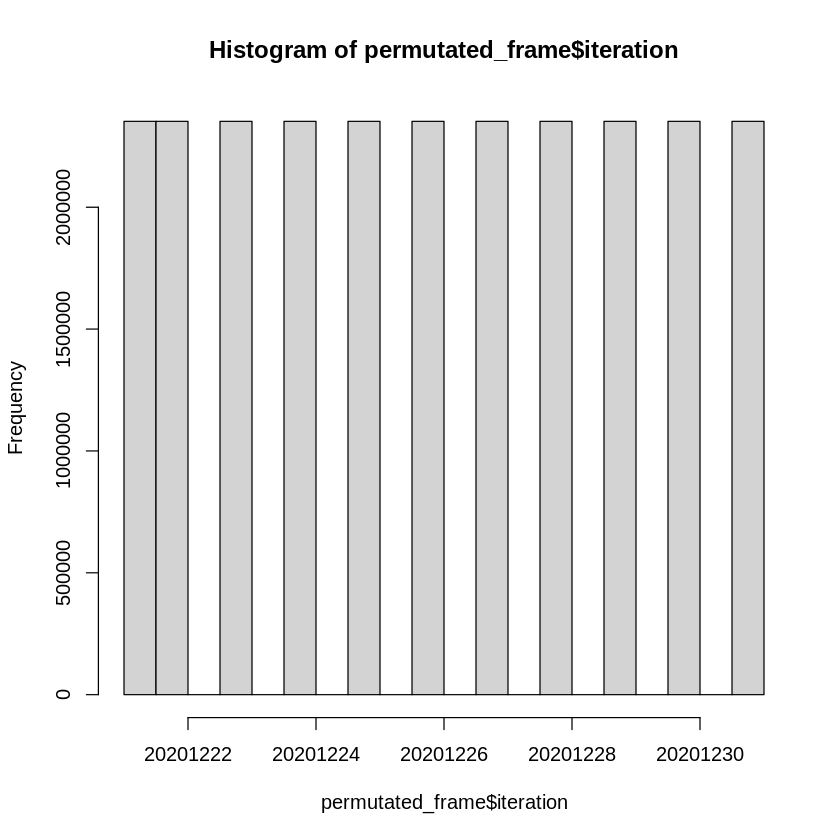

In [14]:
hist(permutated_frame$iteration)

In [15]:
head(permutated_frame)

,walk_id,V1,V2,V3,V4,V5,V6,pacbio_frag_ID,walk_length,walk_class,⋯,dist,inter_chr,first_frag_compartment_type,first_frag_compartment_index,second_frag_compartment_type,second_frag_compartment_index,steps,max_span,sum_dists,class
,<chr>,<fct>,<int>,<int>,<fct>,<int>,<int>,<chr>,<int>,<dbl>,⋯,<int>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,anaphase_TI_MC3C_Dpn_t2_4_30_all_100007969 20201221,chr5,43243842,43245093,chr5,43245094,43246174,anaphase_TI_MC3C_Dpn_t2_4_30_all_100007969,1,1,⋯,-1252,FALSE,plus,251,plus,251,1,1252,1252,1
2,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,3660814,3661600,chr6,6992083,6992530,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-3331269,FALSE,plus,294,plus,295,5,6576841,19687593,1
3,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,6992083,6992530,chr6,10234212,10234975,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-3242129,FALSE,plus,295,plus,296,5,6576841,19687593,1
4,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,10234212,10234975,chr6,10236219,10236685,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-2007,FALSE,plus,296,plus,296,5,6576841,19687593,1
5,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,10236219,10236685,chr6,3680843,3681677,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,6555376,FALSE,plus,296,plus,294,5,6576841,19687593,1
6,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,3680843,3681677,chr6,10237655,10238975,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-6556812,FALSE,plus,294,plus,296,5,6576841,19687593,1


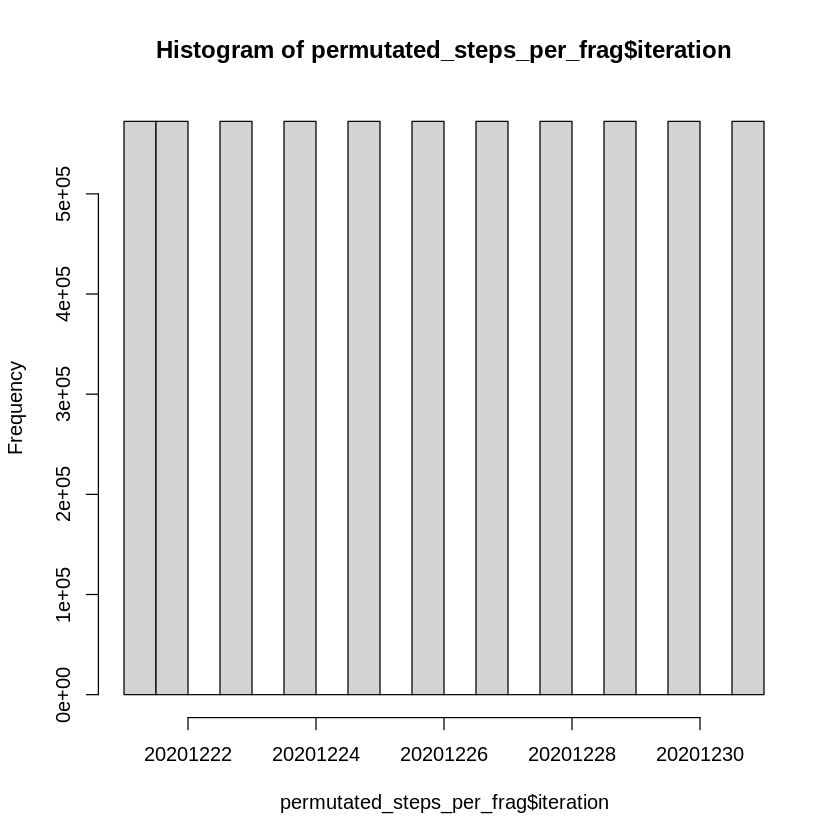

In [16]:
hist(permutated_steps_per_frag$iteration)

In [17]:
head(permutated_steps_per_frag)

iteration,dataset,walk_id,steps,inter_chr,inter_char_proportion,max_span,min_coordinate,max_coordinate,max_int_dist,num_chr,sum_dists,chr,number_of_compartment_types,compartment,number_of_compartments,first_compartment,class
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100008088 20201221,6,0,0,5756011,40285682,46042160,5756011,1,21565244,chr12,2,non_unique_compartment,3,minus,1
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100008185 20201221,7,0,0,34141474,1507096,35648912,34141474,1,68282675,chr4,2,non_unique_compartment,6,minus,1
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100008363 20201221,5,0,0,53481,13344601,13398347,38687,1,95827,chr7,1,minus,1,minus,1
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100008669 20201221,1,0,0,3814361,68141946,71957443,3814361,1,3814361,chr12,2,non_unique_compartment,2,minus,1
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100010015 20201221,2,0,0,16012390,90805931,106819211,16012390,1,31536096,chr14,2,non_unique_compartment,2,plus,1
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,prometaphase_TI_MC3C_Dpn_t0Mit_4_30_T1_all_100010193 20201221,1,0,0,27597978,105451888,133050436,27597978,1,27597978,chr10,2,non_unique_compartment,2,minus,1


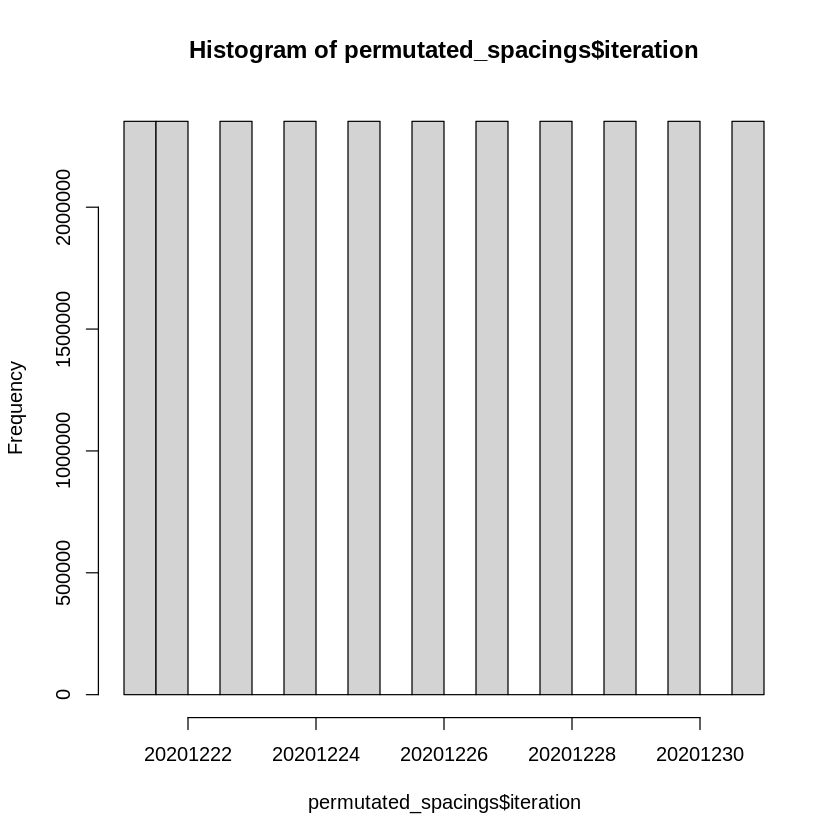

In [18]:
hist(permutated_spacings$iteration)

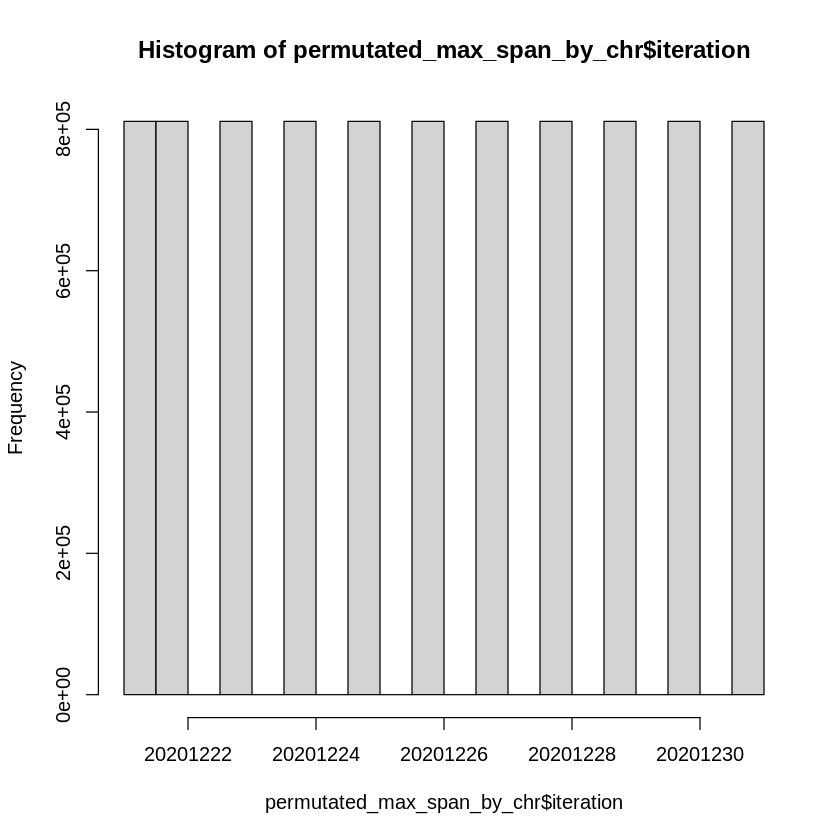

In [19]:
hist(permutated_max_span_by_chr$iteration)

In [20]:
permutated_frame$inter_chr <- with(permutated_frame, V1 != V4)

In [60]:
colnames(permutated_frame)

[1] "walk_id"                       "V1"                           
 [3] "V2"                            "V3"                           
 [5] "V4"                            "V5"                           
 [7] "V6"                            "pacbio_frag_ID"               
 [9] "walk_length"                   "walk_class"                   
[11] "full_dataset_ID"               "state"                        
[13] "size"                          "dataset"                      
[15] "iteration"                     "dist"                         
[17] "inter_chr"                     "first_frag_compartment_type"  
[19] "first_frag_compartment_index"  "second_frag_compartment_type" 
[21] "second_frag_compartment_index" "steps"                        
[23] "max_span"                      "sum_dists"                    
[25] "class"

In [21]:
permutated_steps_per_frag <- permutated_frame %>%
  group_by(iteration, dataset, walk_id) %>%
  summarise(steps = length(V1),
            inter_chr = sum(inter_chr, na.rm = TRUE),
            inter_char_proportion = sum(inter_chr, na.rm = TRUE)  / length(V1),
            max_span = abs(max(as.integer(c(V2, V5)) - min(as.integer(c(V2, V5))))),
            min_coordinate = min(as.integer(c(V2, V3, V5, V6))),
            max_coordinate = max(as.integer(c(V2, V3, V5, V6))),
            max_int_dist = suppressWarnings(max(abs(dist), na.rm=TRUE)),
            num_chr = length(unique(c(V1, V4))),
            sum_dists = sum(abs(dist)),
            chr = ifelse( length(unique(c(V1, V4)))==1, as.character(V1), "*"),
            different_compartment_ints_number = sum(first_frag_compartment_type != second_frag_compartment_type, na.rm = TRUE),
            number_of_compartment_types = length(unique(c(first_frag_compartment_type,
                                                          second_frag_compartment_type))),
            compartment = ifelse(length(unique(c(first_frag_compartment_type,
                                                 second_frag_compartment_type))) == 1,
                                 unique(c(first_frag_compartment_type,
                                          second_frag_compartment_type)),
                                 "non_unique_compartment"),
            number_of_compartments = length(unique(c(first_frag_compartment_index,
                                                     second_frag_compartment_index))),
            different_compartment_index_ints_number = sum(first_frag_compartment_index != second_frag_compartment_index, na.rm = TRUE),
            first_compartment = first_frag_compartment_type[[1]])

`summarise()` regrouping output by 'iteration', 'dataset' (override with `.groups` argument)



In [22]:
# Add a class column to the steps_per_frag data frame
# Class 1 has frags that are only in one chromosome
# Class 2 has frags that are only in two chromosomes
# Class 3 has frags in three or more chromosomes
permutated_steps_per_frag$class <- permutated_steps_per_frag$num_chr
permutated_steps_per_frag$class[permutated_steps_per_frag$class > 3] <- 3

permutations_info_per_step_by_dataset <- permutated_steps_per_frag %>%
  subset(class != 3) %>%
  group_by(iteration, dataset, steps) %>%
  summarize(intra_chromosome = sum(num_chr == 1)/length(num_chr),
            fraction_cis_hops = 1 - (sum(inter_chr)/sum(steps)),
            fraction_one_compartment_type = sum(number_of_compartment_types == 1) / length(number_of_compartment_types),
            fraction_same_compartment_ints = 1 - (sum(different_compartment_ints_number) / sum(steps)))


`summarise()` regrouping output by 'iteration', 'dataset' (override with `.groups` argument)



In [23]:
ls()


[1] "direct_ints"                           
 [2] "outDataDir"                            
 [3] "permutated_class_1_ranges_list"        
 [4] "permutated_direct_ints"                
 [5] "permutated_direct_ints_max_span_by_chr"
 [6] "permutated_direct_ints_steps_per_frag" 
 [7] "permutated_file"                       
 [8] "permutated_frame"                      
 [9] "permutated_max_span_by_chr"            
[10] "permutated_spacings"                   
[11] "permutated_spacings_frame"             
[12] "permutated_steps_per_frag"             
[13] "permutation_permutated_files"          
[14] "permutations_info_per_step_by_dataset" 
[15] "permuteDir"                            
[16] "R1env"                                 
[17] "R2env"                                 
[18] "steps_per_frag_sumarized"              
[19] "walkDir"

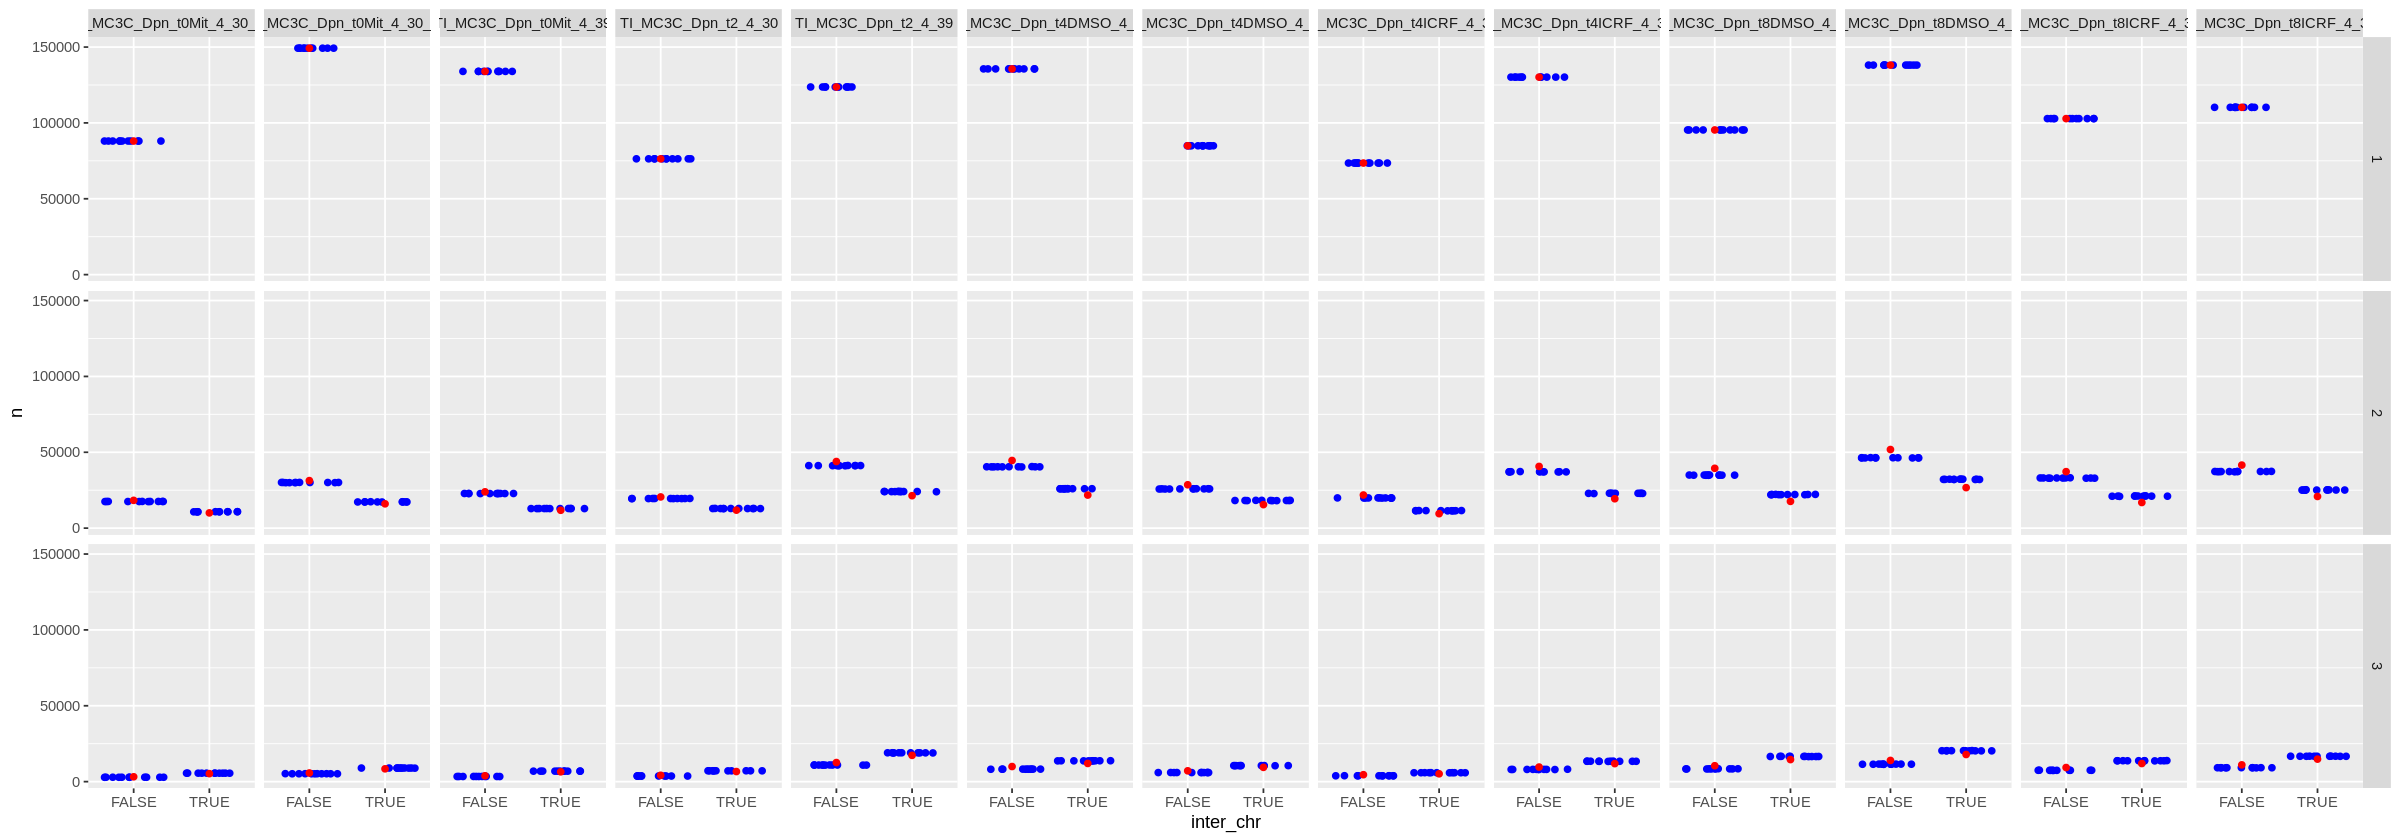

In [24]:
#Plotting inter_chr counts for each class of walk for permutations vs real walks
#Real walks in red, permutations in blue
#False = not inter_chr, True = inter_chr
#Permutations fo G1 samples have more inter_chr steps than real walks, less so for mitotic, for class 2
p <- ggplot() +
  geom_jitter(data = permutated_frame %>% mutate(inter_chr = V1 != V4) %>% count(iteration, dataset, class, inter_chr), mapping = aes(x = inter_chr, y = n), colour = "blue") +
  geom_point(data = direct_ints %>% ungroup() %>% count(dataset, class, inter_chr), mapping = aes(x = inter_chr, y = n), colour = "red") +
  facet_grid(class ~ dataset)

options(repr.plot.width = 20)

print(p)

In [25]:
colnames(permutated_steps_per_frag)

[1] "iteration"                              
 [2] "dataset"                                
 [3] "walk_id"                                
 [4] "steps"                                  
 [5] "inter_chr"                              
 [6] "inter_char_proportion"                  
 [7] "max_span"                               
 [8] "min_coordinate"                         
 [9] "max_coordinate"                         
[10] "max_int_dist"                           
[11] "num_chr"                                
[12] "sum_dists"                              
[13] "chr"                                    
[14] "different_compartment_ints_number"      
[15] "number_of_compartment_types"            
[16] "compartment"                            
[17] "number_of_compartments"                 
[18] "different_compartment_index_ints_number"
[19] "first_compartment"                      
[20] "class"

`summarise()` regrouping output by 'dataset', 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'dataset' (override with `.groups` argument)



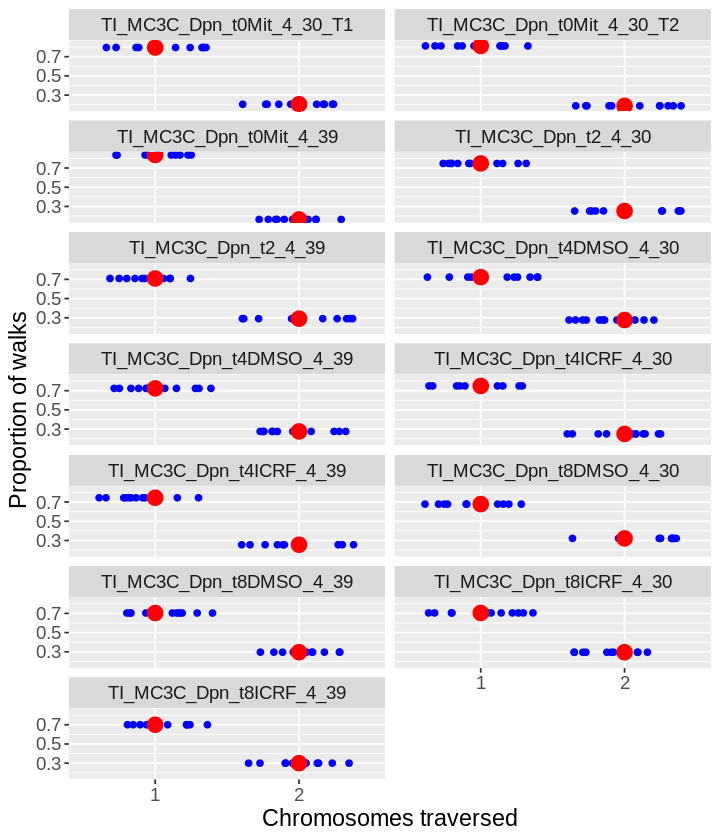

In [26]:
#excluding walks with 3 or more chromosomes
p <- ggplot() +
  geom_jitter(data = permutated_steps_per_frag %>% filter(class != 3) %>%
                group_by(dataset, iteration) %>% mutate(number = n()) %>%
                ungroup() %>% group_by(dataset, class, iteration) %>%
                summarise( n = n() / unique(number)),
              mapping = aes(x = as.factor(class), y = n), colour = "blue") +
  geom_point(data = steps_per_frag_sumarized %>% ungroup() %>% filter(class != 3) %>%
                group_by(dataset) %>% mutate(number = n()) %>%
                ungroup() %>% group_by(dataset, class) %>%
                summarise( n = n() / unique(number)),
              mapping = aes(x = as.factor(class), y = n), colour = "red", size = 4) +
  facet_wrap( ~ dataset, ncol = 2) +
  scale_x_discrete("Chromosomes traversed") +
  theme(text = element_text(size = 14)) +
  scale_y_continuous("Proportion of walks")

options(repr.plot.width = 6)

print(p)

In [27]:
head(permutated_frame)

,walk_id,V1,V2,V3,V4,V5,V6,pacbio_frag_ID,walk_length,walk_class,⋯,dist,inter_chr,first_frag_compartment_type,first_frag_compartment_index,second_frag_compartment_type,second_frag_compartment_index,steps,max_span,sum_dists,class
,<chr>,<fct>,<int>,<int>,<fct>,<int>,<int>,<chr>,<int>,<dbl>,⋯,<int>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,anaphase_TI_MC3C_Dpn_t2_4_30_all_100007969 20201221,chr5,43243842,43245093,chr5,43245094,43246174,anaphase_TI_MC3C_Dpn_t2_4_30_all_100007969,1,1,⋯,-1252,FALSE,plus,251,plus,251,1,1252,1252,1
2,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,3660814,3661600,chr6,6992083,6992530,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-3331269,FALSE,plus,294,plus,295,5,6576841,19687593,1
3,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,6992083,6992530,chr6,10234212,10234975,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-3242129,FALSE,plus,295,plus,296,5,6576841,19687593,1
4,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,10234212,10234975,chr6,10236219,10236685,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-2007,FALSE,plus,296,plus,296,5,6576841,19687593,1
5,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,10236219,10236685,chr6,3680843,3681677,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,6555376,FALSE,plus,296,plus,294,5,6576841,19687593,1
6,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265 20201221,chr6,3680843,3681677,chr6,10237655,10238975,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,5,1,⋯,-6556812,FALSE,plus,294,plus,296,5,6576841,19687593,1


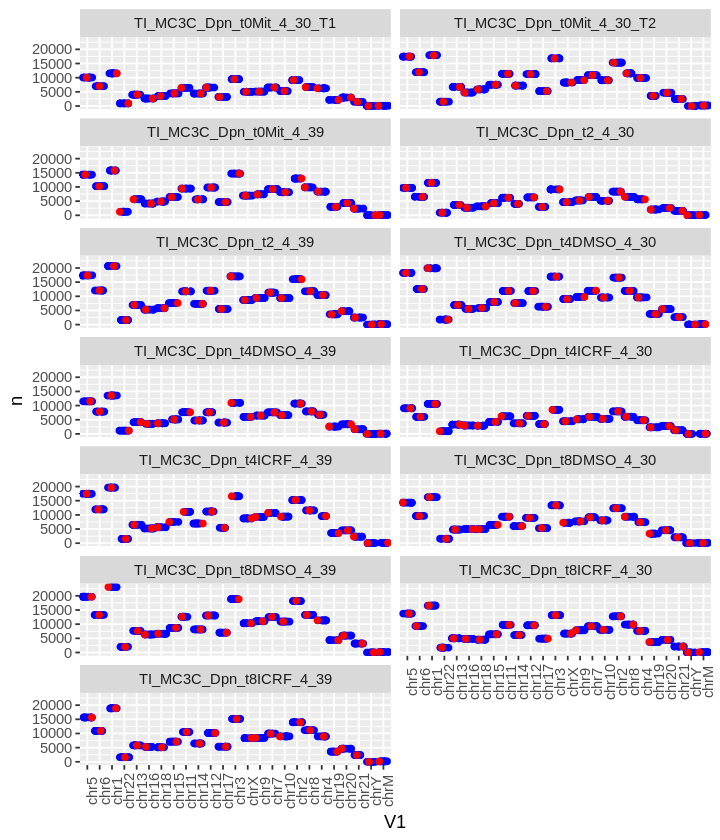

In [28]:
#number of first fragment per chromosome, would be better to sort by chromosome number...
p <- ggplot() +
  geom_jitter(data = permutated_frame %>% count(iteration, dataset, V1), mapping = aes(x = V1, y = n), colour = "blue") +
  geom_jitter(data = direct_ints %>% ungroup() %>% mutate(V1 = V1) %>% count(dataset, V1), mapping = aes(x = V1, y = n), colour = "red") +
  facet_wrap( ~ dataset, ncol = 2) +
  theme(axis.text.x = element_text(angle = 90))
print(p)

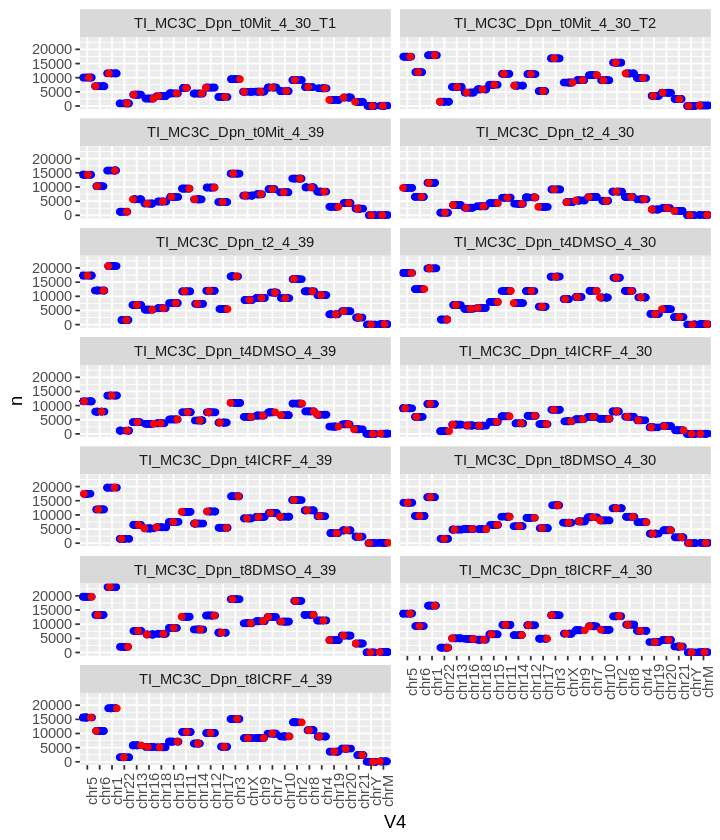

In [29]:
#number of second fragment per chromosome
p <- ggplot() +
  geom_jitter(data = permutated_frame %>% count(iteration, dataset, V4), mapping = aes(x = V4, y = n), colour = "blue") +
  geom_jitter(data = direct_ints %>% ungroup() %>% mutate(V5 = V5) %>% count(dataset, V5), #updated
              mapping = aes(x = V5, y = n), 
              colour = "red") +
  facet_wrap( ~ dataset, ncol = 2) +
  theme(axis.text.x = element_text(angle = 90))
print(p)

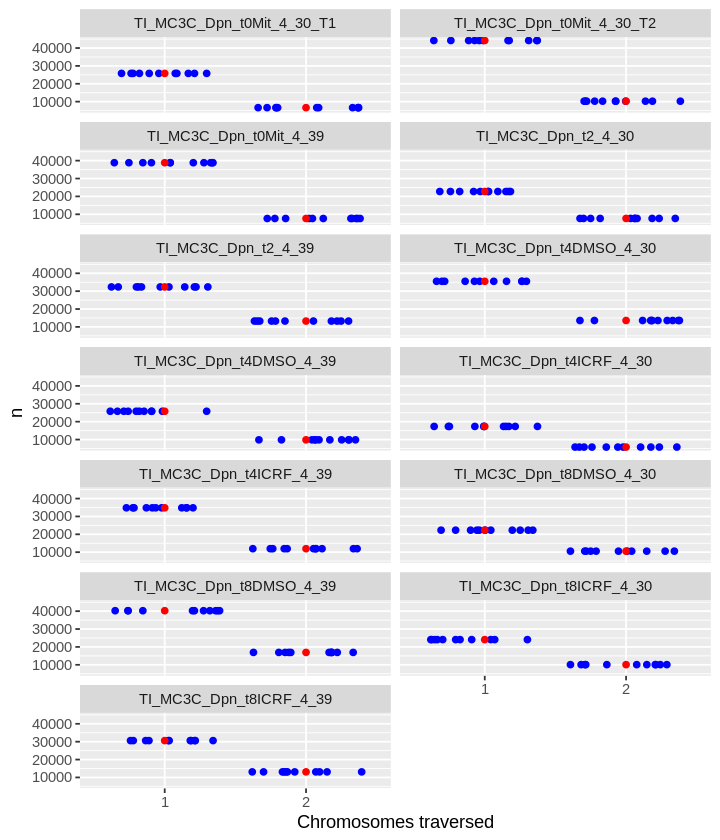

In [30]:
p <- ggplot() +
  geom_jitter(data = permutated_steps_per_frag %>% filter(class != 3) %>% count(iteration, dataset, class), mapping = aes(x = as.factor(class), y = n), colour = "blue") +
  geom_point(data = steps_per_frag_sumarized %>% ungroup() %>% filter(class != 3) %>% count(dataset, class), mapping = aes(x = as.factor(class), y = n), colour = "red") +
  facet_wrap( ~ dataset, ncol = 2) +
  scale_x_discrete("Chromosomes traversed")
print(p)
#no class 3

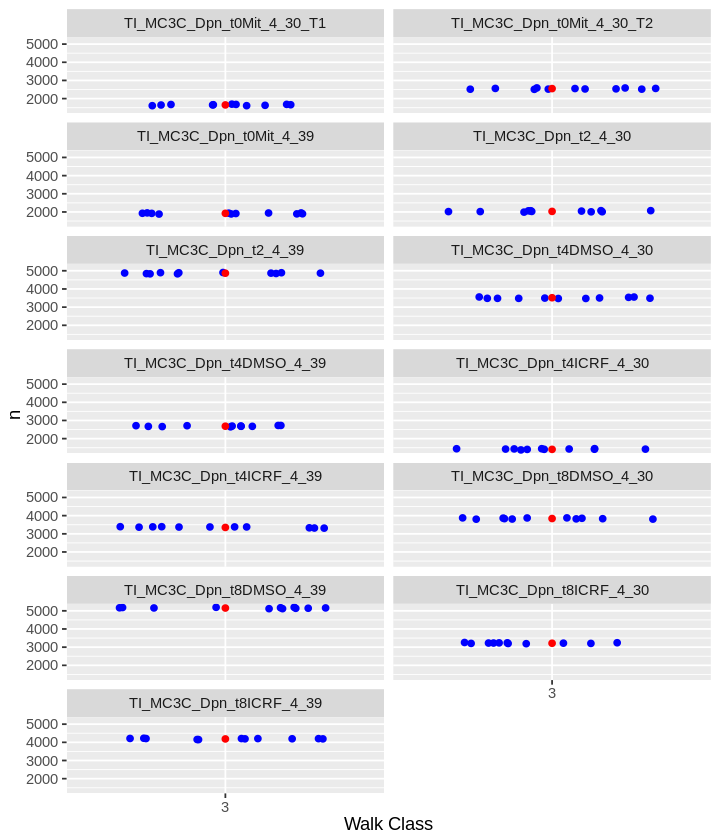

In [31]:
#same as above but class 3 only
p <- ggplot() +
  geom_jitter(data = permutated_steps_per_frag %>% filter(class == 3) %>% count(iteration, dataset, class), mapping = aes(x = as.factor(class), y = n), colour = "blue") +
  geom_point(data = steps_per_frag_sumarized %>% ungroup() %>% filter(class == 3) %>% count(dataset, class), mapping = aes(x = as.factor(class), y = n), colour = "red") +
  facet_wrap( ~ dataset, ncol = 2) +
  scale_x_discrete("Walk Class")
print(p)


In [32]:
colnames(direct_ints)

[1] "pacbio_frag_ID"                "V1"                           
 [3] "V2"                            "V3"                           
 [5] "V4"                            "V5"                           
 [7] "V6"                            "V7"                           
 [9] "V8"                            "V9"                           
[11] "size"                          "state"                        
[13] "dataset"                       "treatment"                    
[15] "biorep"                        "techrep"                      
[17] "fully_mapped"                  "dist"                         
[19] "inter_chr"                     "direction"                    
[21] "unique_reduced_ranges"         "number_of_non_unique_ranges"  
[23] "number_of_unique_ranges"       "first_frag_compartment_type"  
[25] "first_frag_compartment_index"  "second_frag_compartment_type" 
[27] "second_frag_compartment_index" "class"                        
[29] "steps"                         "max_span"                     
[31] "sum_dists"                     "ratio_80kb"                   
[33] "ratio_100kb"                   "ratio_120kb"                  
[35] "full_dataset_ID"

In [33]:
colnames(permutated_frame)

[1] "walk_id"                       "V1"                           
 [3] "V2"                            "V3"                           
 [5] "V4"                            "V5"                           
 [7] "V6"                            "pacbio_frag_ID"               
 [9] "walk_length"                   "walk_class"                   
[11] "full_dataset_ID"               "state"                        
[13] "size"                          "dataset"                      
[15] "iteration"                     "dist"                         
[17] "inter_chr"                     "first_frag_compartment_type"  
[19] "first_frag_compartment_index"  "second_frag_compartment_type" 
[21] "second_frag_compartment_index" "steps"                        
[23] "max_span"                      "sum_dists"                    
[25] "class"

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 360914 rows containing non-finite values (stat_density).”
Warning message:
“Removed 4571124 rows containing non-finite values (stat_density).”


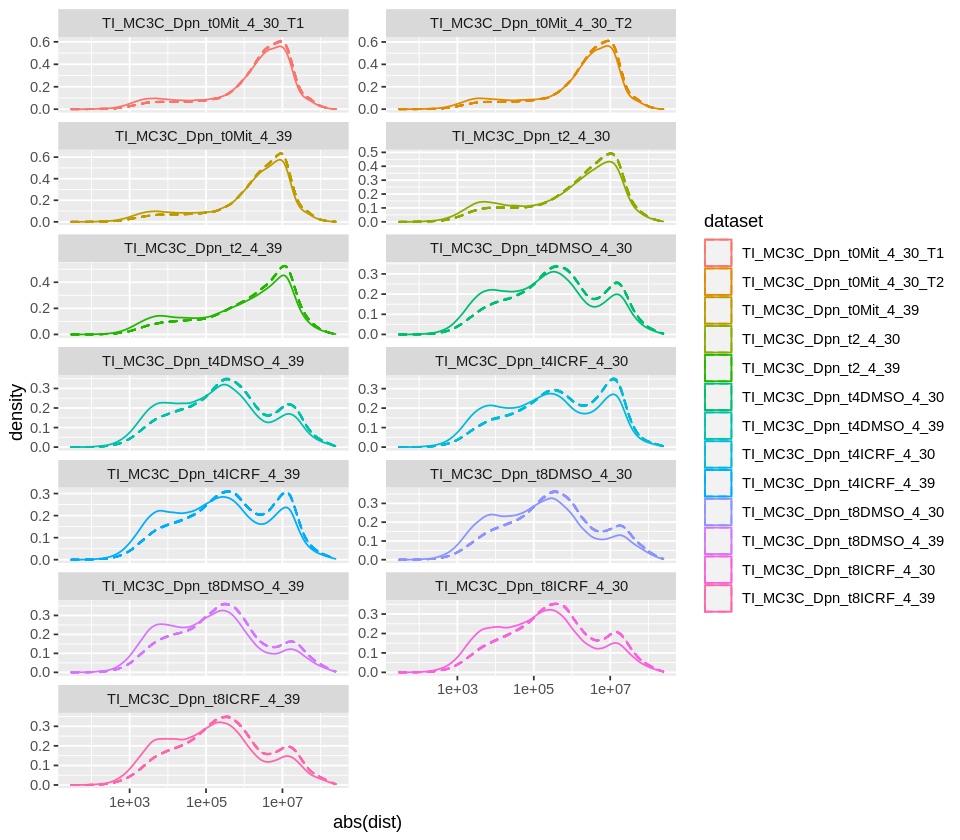

In [34]:
#This one plots step size distribution - dist is the step size for each direct_int
#This is pretty useful - difference between step size distribution in real vs permuted walks
#Should tell us something about entanglement - not entangled will have more of a shift to larger steps with permutation than entangled
p <- ggplot() +
  geom_density(data = cbind(direct_ints[, c("dist", "dataset", "biorep", "techrep")], type = "real_walk", iteration = 1),
               mapping = aes(colour = dataset, x=abs(dist)), linetype = 1) +
  geom_density(data = cbind(permutated_frame[, c("dist", "dataset", "iteration")], type = "simulated_walk"),
               mapping = aes(colour = dataset, x=abs(dist), group = iteration),
               alpha = I(1/2), linetype = 2) +
  facet_wrap(~ dataset, scales = "free_y", ncol = 2) +
  scale_x_log10()
options(repr.plot.width = 8)
print(p)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4571124 rows containing non-finite values (stat_density).”


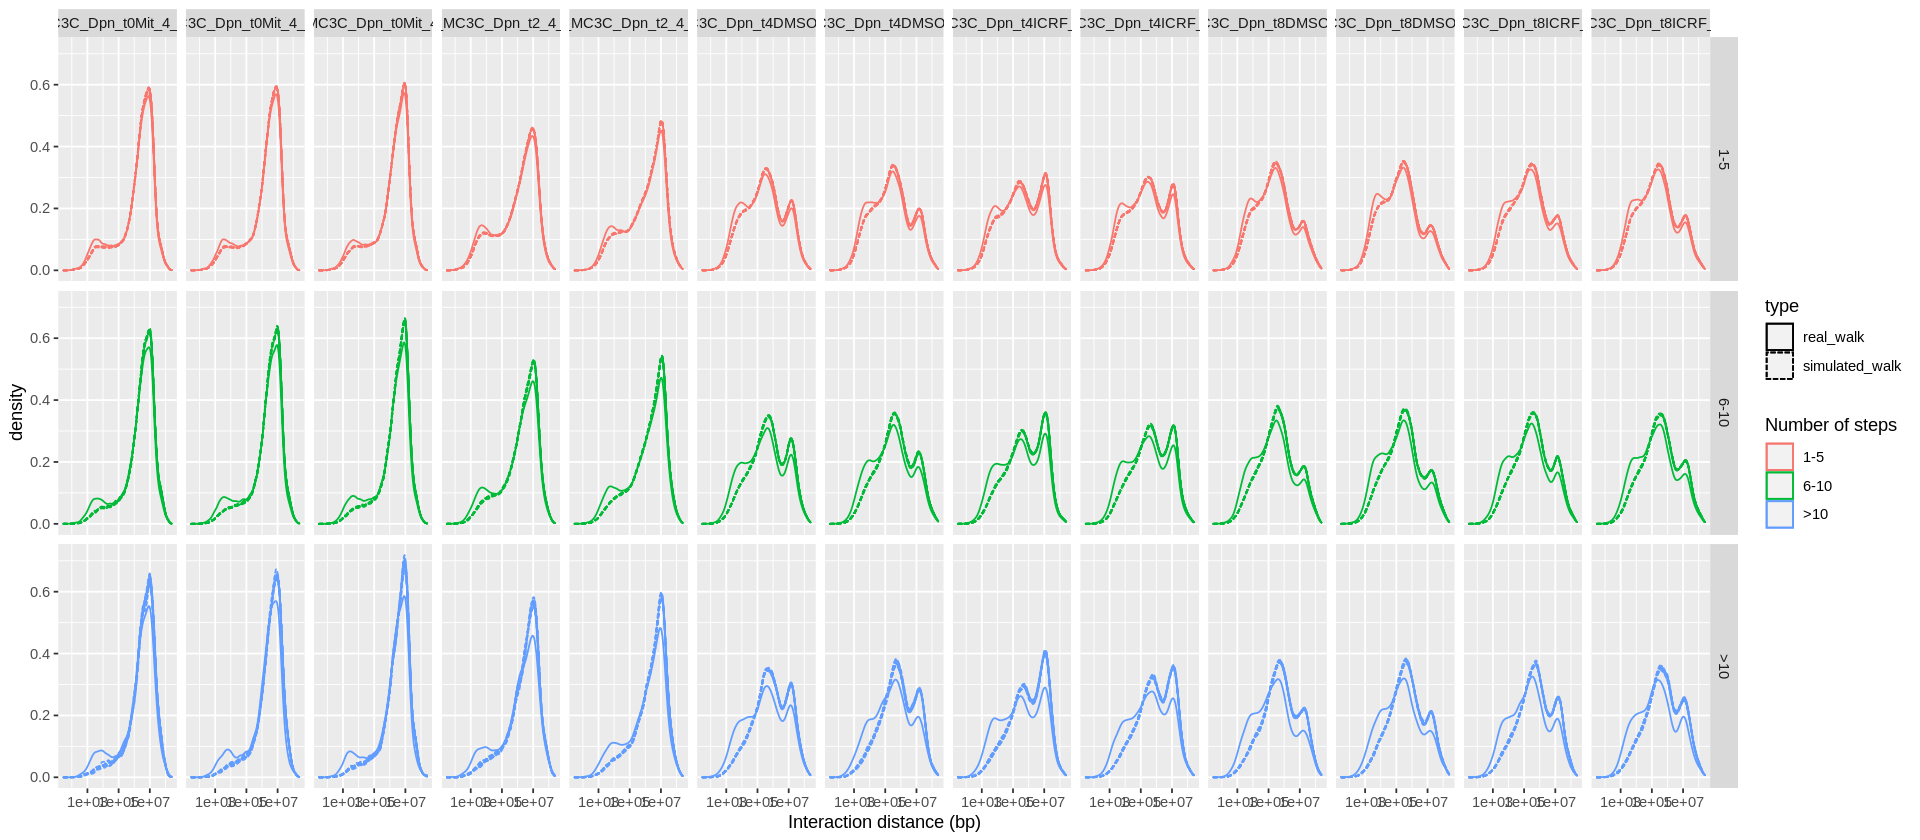

In [35]:
#Step size distribution, by different walk lengths

p <- ggplot(data = (cbind(as.data.frame(permutated_frame)[, c("dist", "dataset", "steps", "iteration")],
                          type = "simulated_walk"))) +
  geom_density(data = cbind(subset(direct_ints, class == 1)[, c("dist", "dataset", "steps")],
                            type = "real_walk"),
               aes(x=abs(dist), colour=cut(steps, c(0, 5, 10, 100), labels = c("1-5", "6-10", ">10")),
                   linetype = type)) +
  geom_density(data = (cbind(as.data.frame(permutated_frame)[, c("dist", "dataset", "steps", "iteration")],
                             type = "simulated_walk")),
               aes(x=abs(dist), colour=cut(steps, c(0, 5, 10, 100), labels = c("1-5", "6-10", ">10")),
                   linetype = type, group = iteration), alpha = I(1/2)) +
  scale_x_log10() +
  facet_grid(cut(steps, c(0, 5, 10, 100), labels = c("1-5", "6-10", ">10")) ~ dataset) +
  labs(x = "Interaction distance (bp)") +
  scale_color_discrete(name = "Number of steps")
options(repr.plot.width = 16)
print(p)

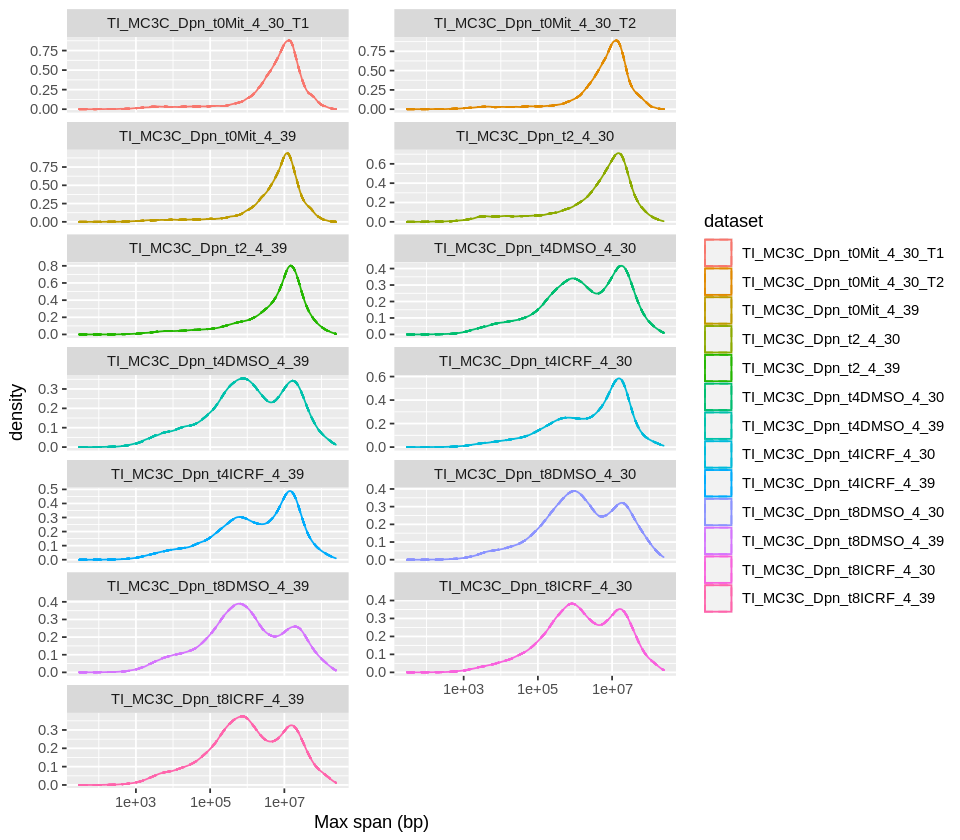

In [36]:
#max span - should be the same for real vs permuted if worked correctly...
p <- ggplot() +
  geom_density(data = cbind(subset(steps_per_frag_sumarized, class == 1)[, c("max_span", "dataset")],
                            type = "real_walk", iteration = 1),
               mapping = aes(colour = dataset, x=max_span), linetype = 1) +
  geom_density(data = cbind(subset(data.frame(permutated_steps_per_frag), class == 1)[, c("max_span", "dataset", "iteration")],
                            type = "simulated_walk"),
               mapping = aes(colour = dataset, x=max_span, group = iteration),
               alpha = I(1/2), linetype = 2) +
  facet_wrap(~ dataset, scales = "free_y", ncol = 2) +
  scale_x_log10()+
  labs(x = "Max span (bp)")
options(repr.plot.width = 8)
print(p)

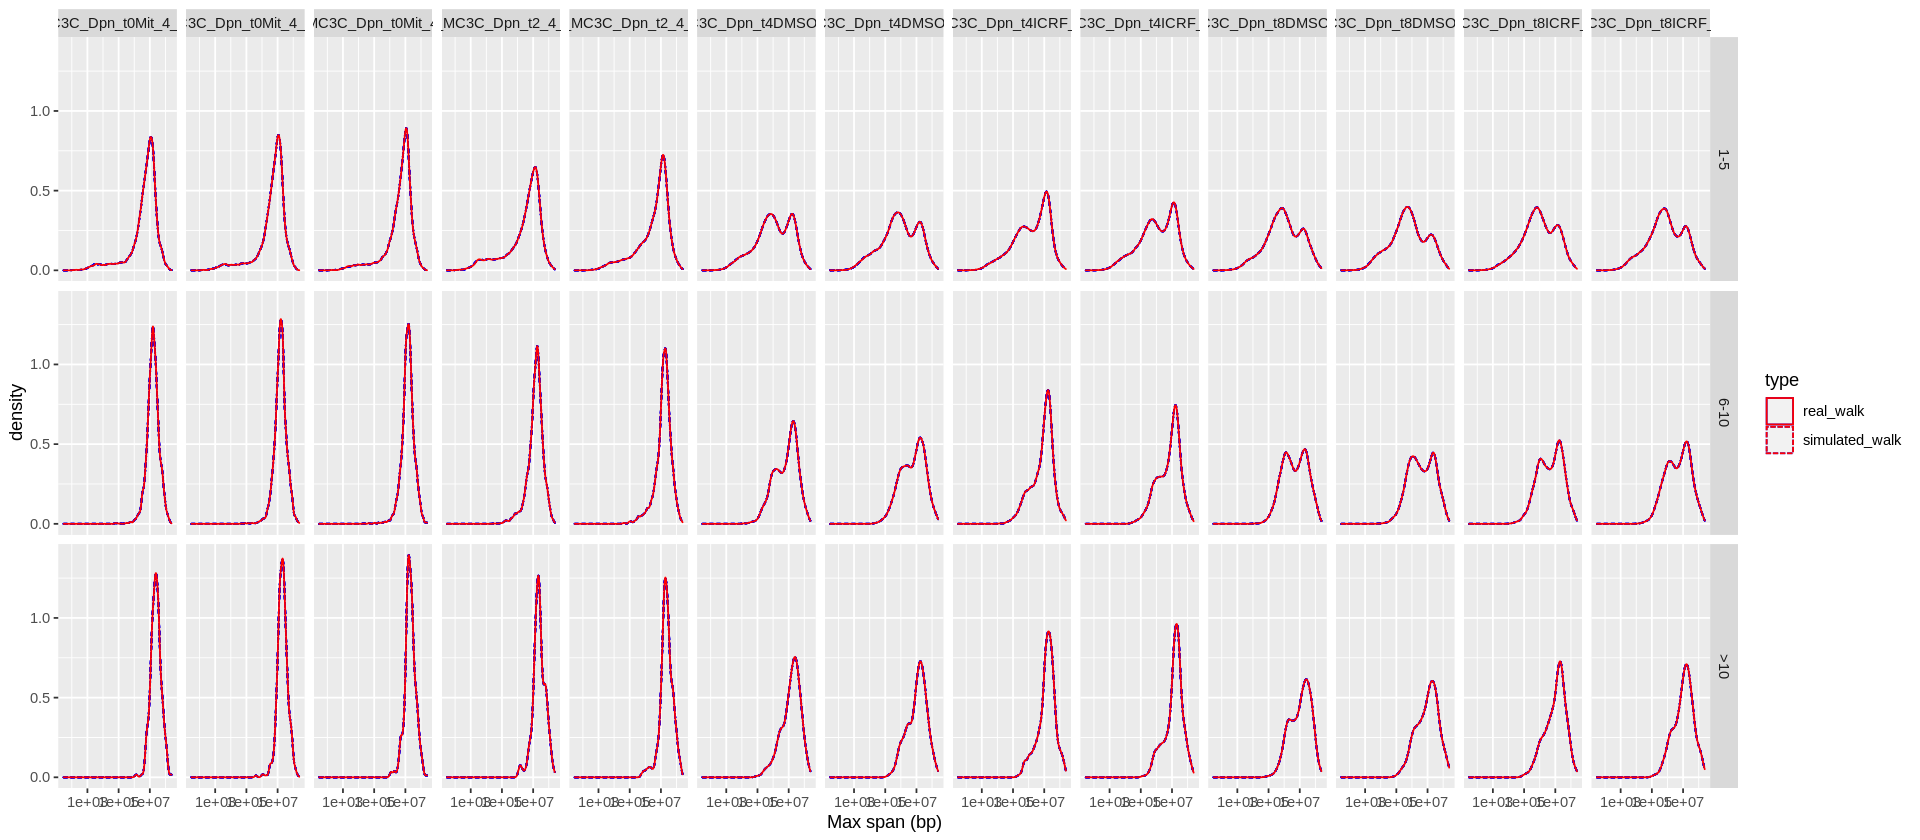

In [37]:
#Max span by number of steps
#This is a good check, would not expect max span to be different between real and simulated walks
#since they are the same steps, just different order
#There are some major differences between DMSO and ICRF at t4 though, and somewhat at t8 as well

p <- ggplot(data = (cbind(as.data.frame(subset(permutated_steps_per_frag, class == 1))[, c("max_span", "dataset", "steps", "iteration")],
                          type = "simulated_walk"))) +
  geom_density(data = (cbind(as.data.frame(subset(permutated_steps_per_frag, class == 1))[, c("max_span", "dataset", "steps", "iteration")],
                     type = "simulated_walk")),
               aes(x=max_span,
                   linetype = type, group = iteration), alpha = I(1/2), colour = "blue") +
  geom_density(data = cbind(subset(steps_per_frag_sumarized, class == 1)[, c("max_span", "dataset", "steps")],
                            type = "real_walk", iteration = 1),
               aes(x=max_span,
                   linetype = type, group = iteration), colour = "red") +
  scale_x_log10() +
  facet_grid(cut(steps, c(0, 5, 10, 100), labels = c("1-5", "6-10", ">10")) ~ dataset) +
  labs(x = "Max span (bp)") +
  scale_color_discrete(name = "Number of steps")
options(repr.plot.width = 16)
print(p)

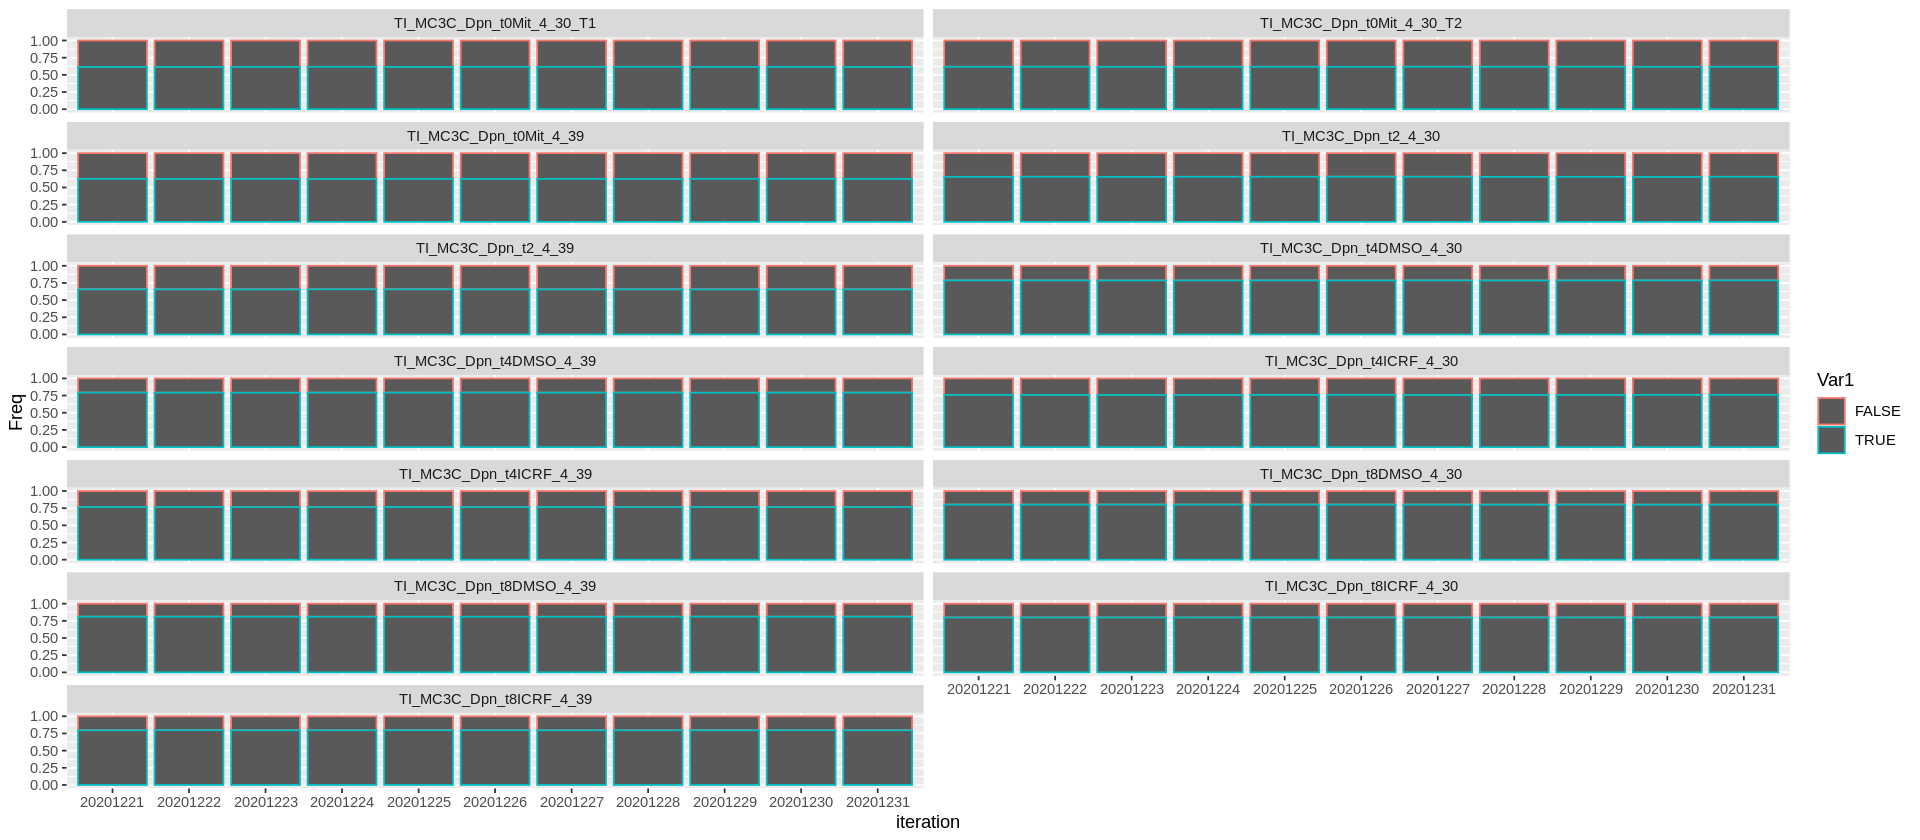

In [38]:
#Frequency of first frag being in same compartment type as second frag
p <- with(permutated_frame,
          as.data.frame(table(first_frag_compartment_type == second_frag_compartment_type,
                              dataset, iteration))) %>%
  ggplot(aes(x=iteration, y=Freq, colour = Var1)) +
  geom_col(position = "fill") +
  facet_wrap(~ dataset, ncol = 2)
options(repr.plot.width = 16)
print(p)

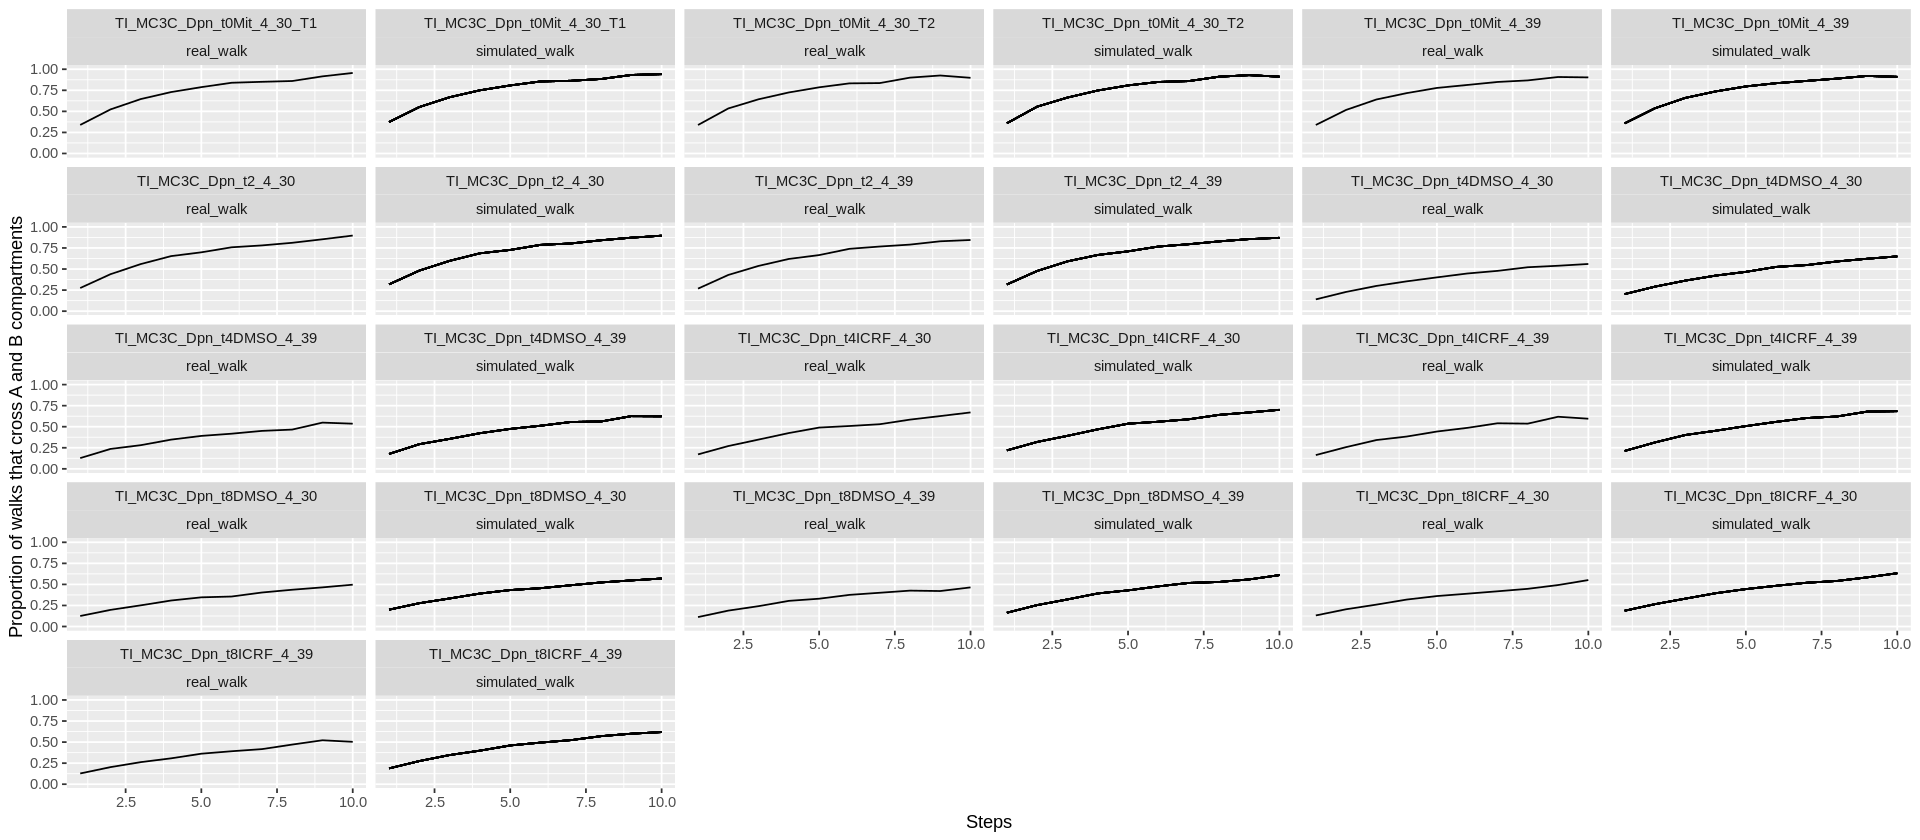

In [39]:
p <- rbind(cbind(subset(steps_per_frag_sumarized, class == 1)[, c("dataset", "number_of_compartment_types", "steps")],
                 type = "real_walk", iteration = 1),
           cbind(as.data.frame(permutated_steps_per_frag)[, c("dataset", "number_of_compartment_types", "steps", "iteration")],
                 type = "simulated_walk")) %>%
  filter(number_of_compartment_types < 3 & steps <= 10) %>%
  count(dataset, iteration, type, number_of_compartment_types, steps) %>%
  group_by(dataset, iteration, type, steps) %>%
  mutate(proportion = n / sum(n)) %>%
  filter(number_of_compartment_types == 2) %>%
  ggplot(aes(x = steps, y = proportion, group = iteration)) +
  geom_line() +
  facet_wrap( ~ dataset + type) +
  scale_y_continuous(limits = c(0, 1)) +
  labs(x = "Steps",
       y = "Proportion of walks that cross A and B compartments")
print(p)

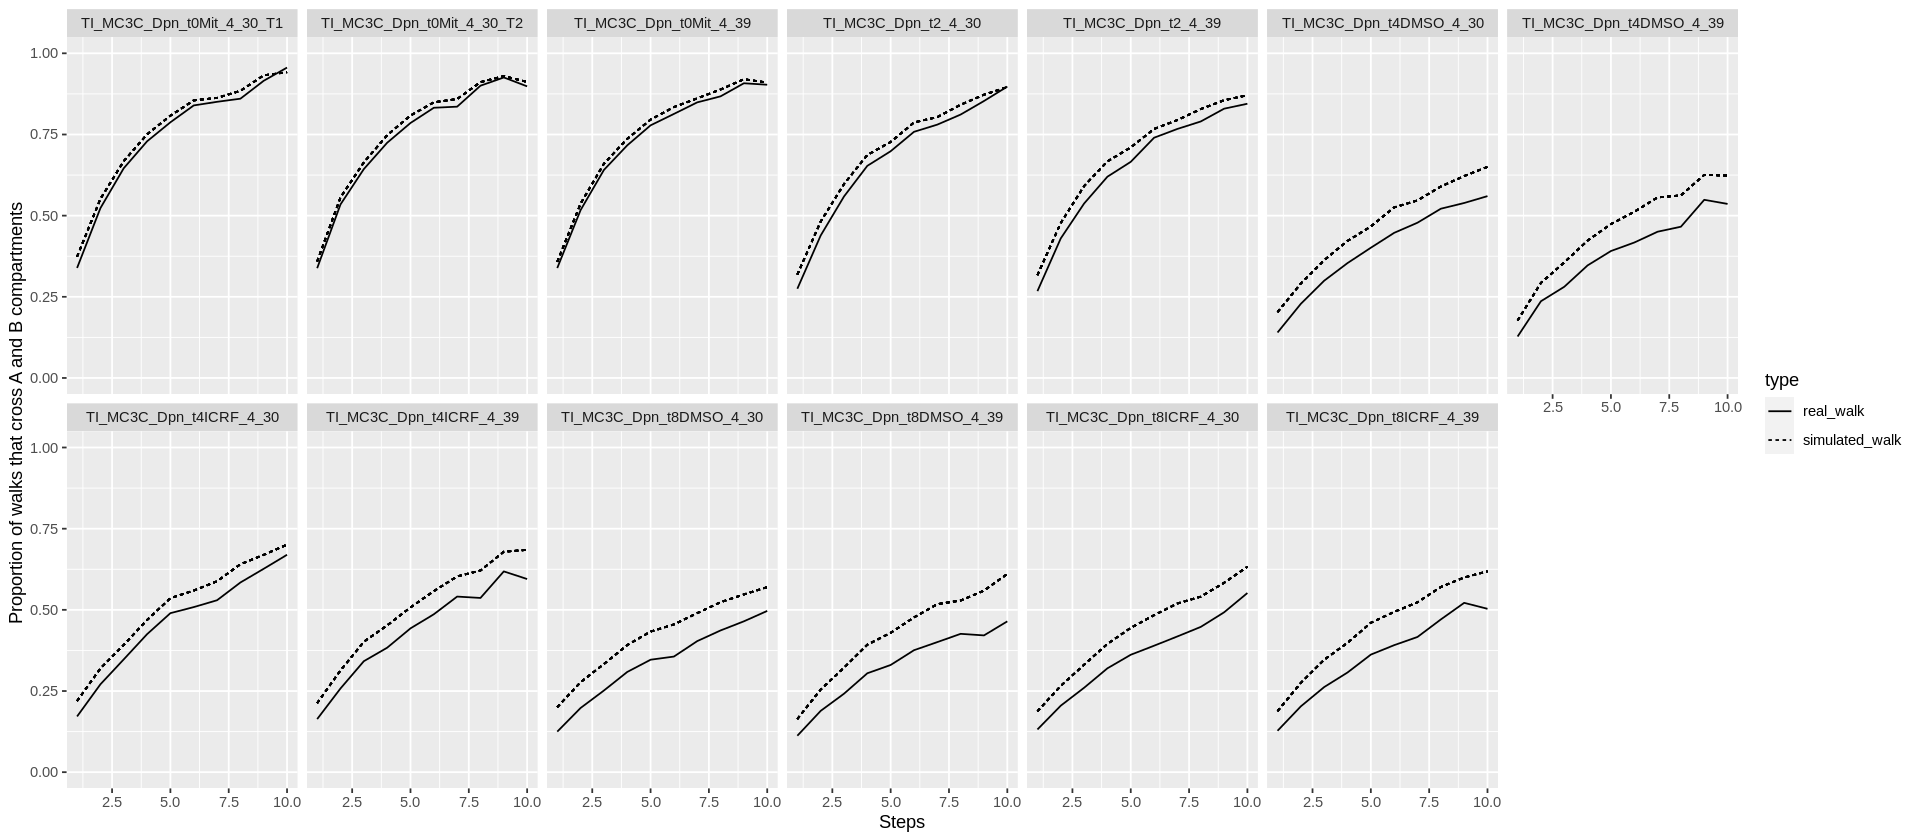

In [40]:
p <- rbind(cbind(subset(steps_per_frag_sumarized, class == 1)[, c("dataset", "number_of_compartment_types", "steps")],
                 type = "real_walk", iteration = 1),
           cbind(as.data.frame(permutated_steps_per_frag)[, c("dataset", "number_of_compartment_types", "steps", "iteration")],
                 type = "simulated_walk")) %>%
  filter(number_of_compartment_types < 3 & steps <= 10) %>%
  count(dataset, iteration, type, number_of_compartment_types, steps) %>%
  group_by(dataset, iteration, type, steps) %>%
  mutate(proportion = n / sum(n)) %>%
  filter(number_of_compartment_types == 2) %>%
  ggplot(aes(x = steps, y = proportion, group = iteration, linetype = type)) +
  geom_line() +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_y_continuous(limits = c(0, 1)) +
  labs(x = "Steps",
       y = "Proportion of walks that cross A and B compartments")
options(repr.plot.width = 16)
print(p)

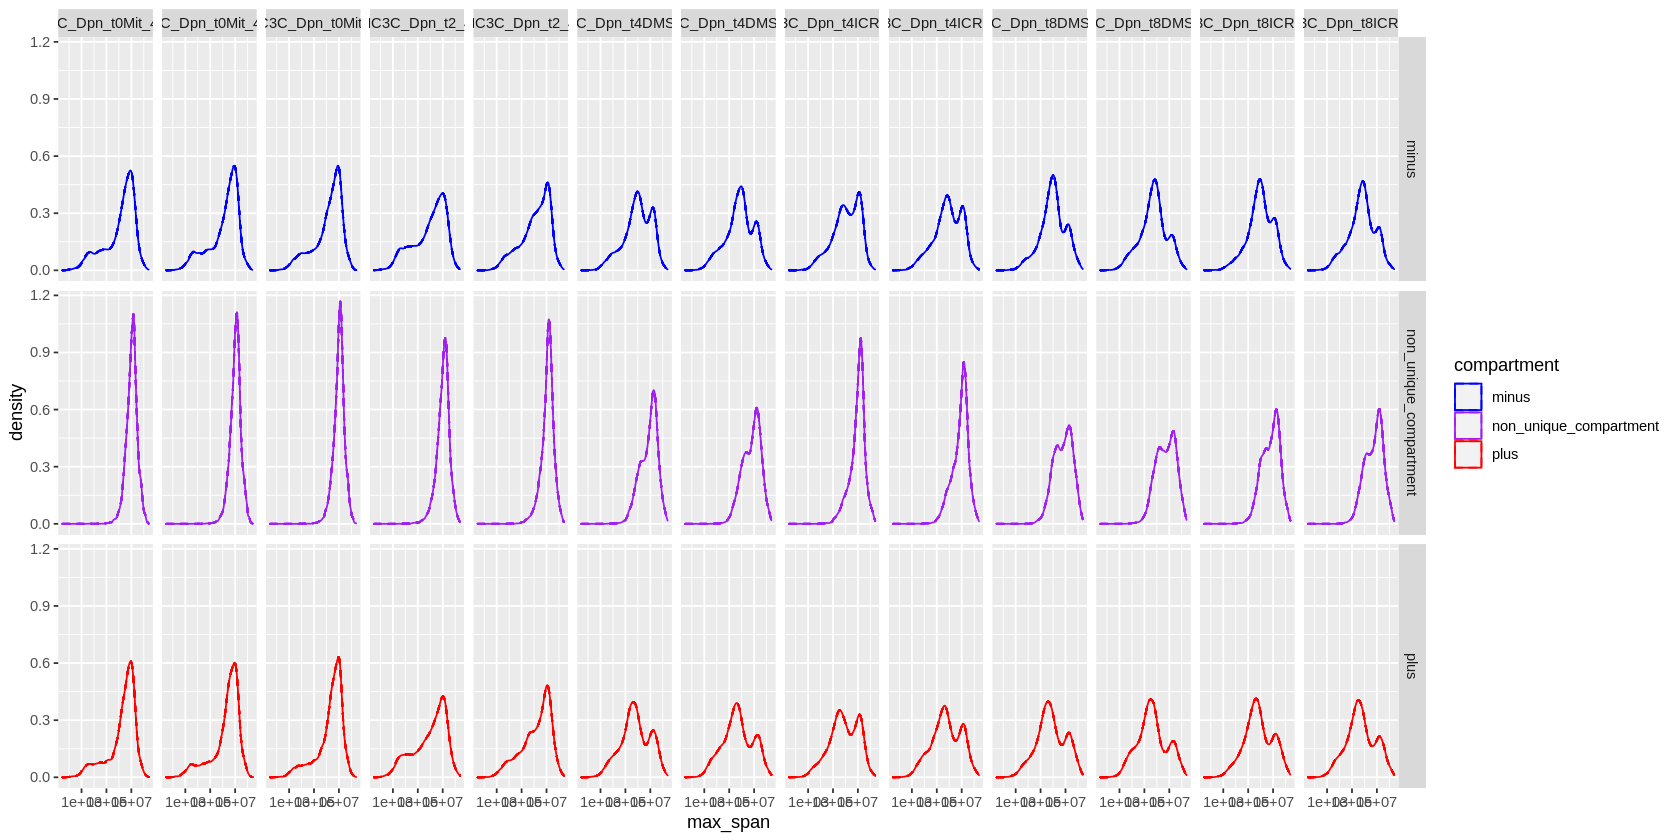

In [41]:
groupLimits <- c("minus", "non_unique_compartment", "plus")
groupColors <- c("blue", "purple", "red")

p <- ggplot() +
  geom_density(data = cbind(subset(steps_per_frag_sumarized, class == 1 & compartment != "NA")[, c("max_span", "dataset", "compartment")],
                            type = "real_walk", iteration = 1),
               mapping = aes(colour = compartment, x=max_span), linetype = 1) +
  geom_density(data = subset(cbind(subset(data.frame(permutated_steps_per_frag), class == 1)[, c("max_span", "dataset", "iteration", "compartment")],
                            type = "simulated_walk"), compartment != "NA"),
               mapping = aes(colour = compartment, x=max_span, group = iteration),
               alpha = I(1/2), linetype = 2) +
  facet_grid(compartment ~ dataset) +
  scale_color_manual(values=groupColors, limits=groupLimits) +
  scale_x_log10() 
options(repr.plot.width = 14)
print(p)

#A and B compartments look different here + IAA, but not in control


`summarise()` regrouping output by 'dataset', 'steps', 'type' (override with `.groups` argument)



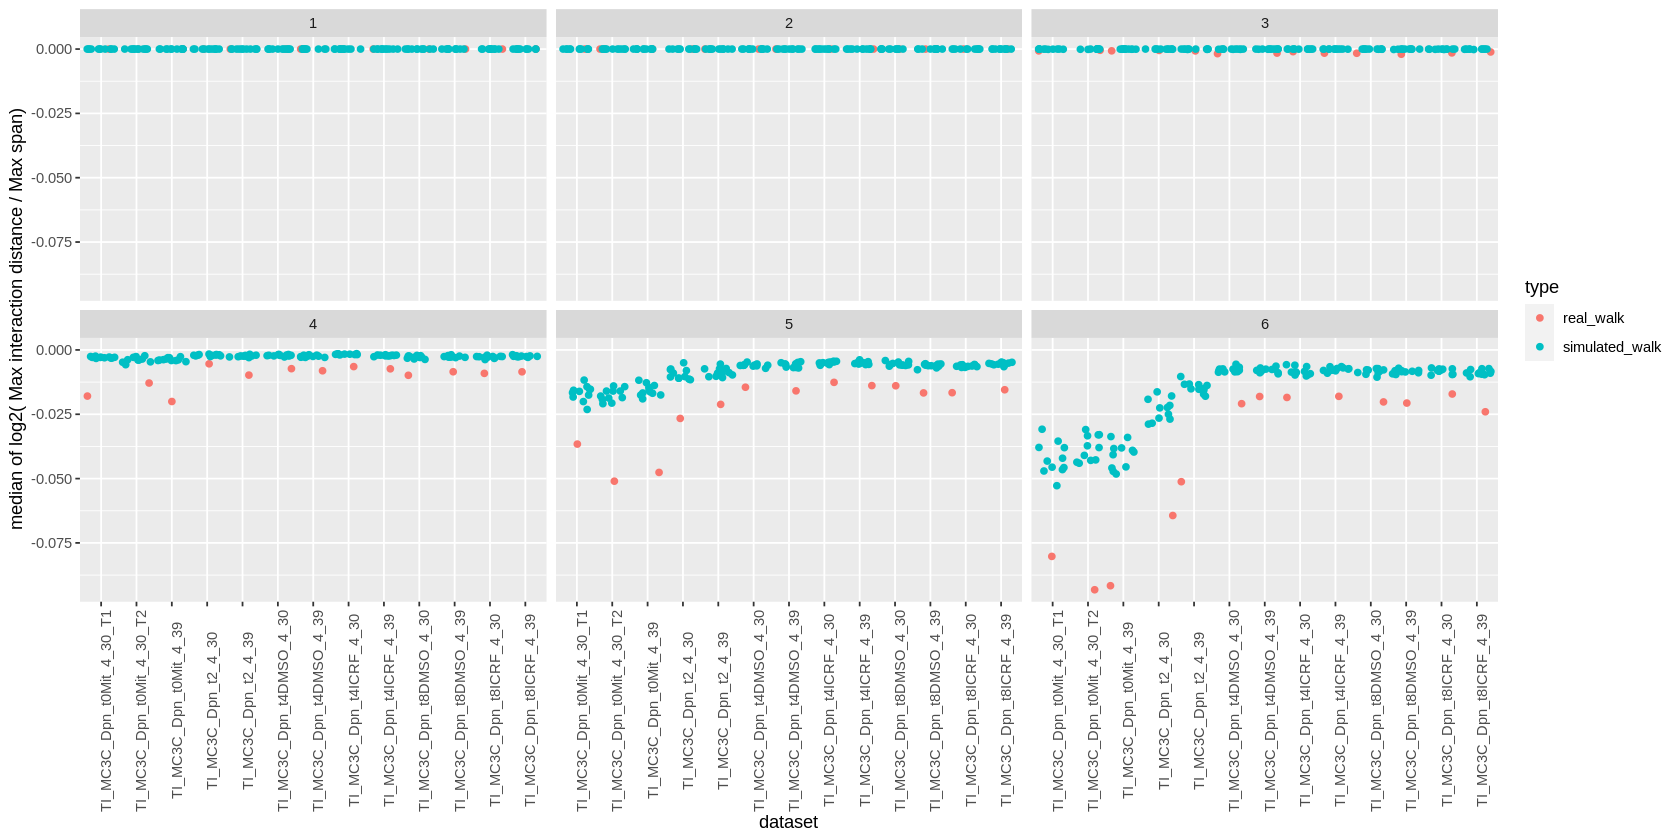

In [42]:
#How different is max step size compared to span in real vs permuted walks?
#Trying to get a measure of whether many small steps or one big step maybe?
#larger numbers mean one step is most of span, while more smaller steps make up span if smaller number
#There is a big difference here between Control and IAA treated - for 5 step walks - IAA treated have less
#even step sizes? Makes sense if more compartmentalized...but not if more entangled...
#Also, real is closer to simulated values for IAA treated (both +/- ICRF)
p <- rbind(cbind(subset(steps_per_frag_sumarized, class == 1)[, c("max_span", "max_int_dist", "dataset", "steps")],
                 type = "real_walk", iteration = 1),
           cbind(as.data.frame(subset(permutated_steps_per_frag, class == 1))[, c("max_span", "max_int_dist", "dataset", "steps", "iteration")],
                 type = "simulated_walk")) %>%
  subset(steps <= 6) %>%
  group_by(dataset, steps, type, iteration) %>%
  summarise(median_log2 = median(log2(max_int_dist / max_span))) %>%
  ggplot(aes(y = median_log2, x = dataset, colour = type)) +
  geom_jitter() +
  facet_wrap( ~ as.factor(steps)) +
  labs(y = "median of log2( Max interaction distance / Max span)") +
  theme(axis.text.x = element_text(angle = 90))
print(p)


`summarise()` regrouping output by 'steps', 'dataset', 'type' (override with `.groups` argument)



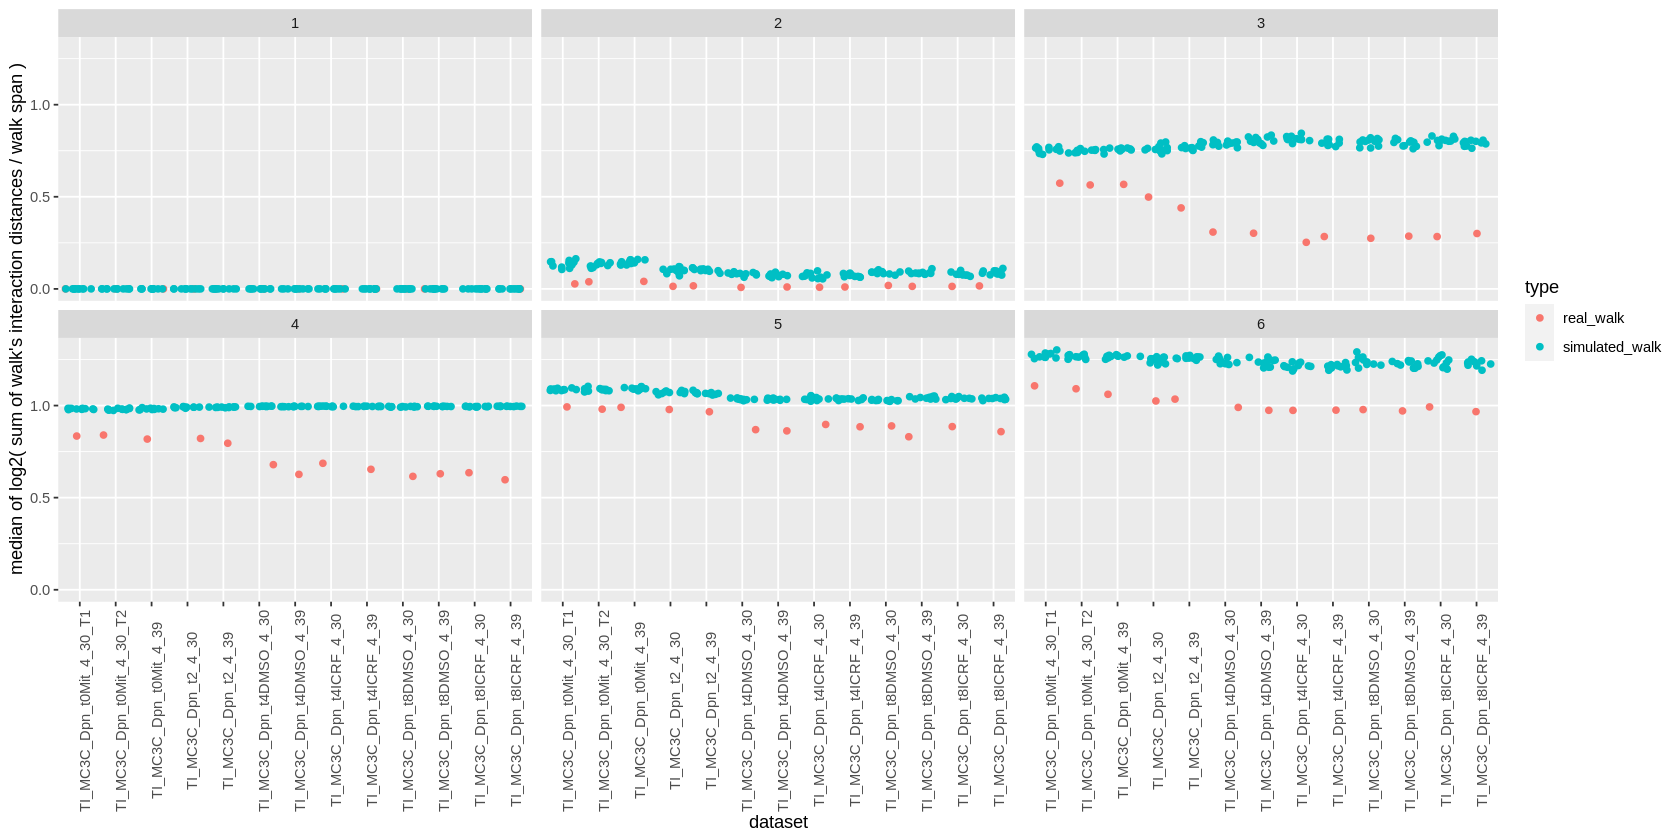

In [43]:
#Are steps evenly spaced? If so, would expect sum to be similar to max span

p <- rbind(cbind(subset(steps_per_frag_sumarized, class == 1)[, c("max_span", "max_int_dist", "dataset", "steps", "sum_dists")],
                 type = "real_walk", iteration = 1),
           cbind(as.data.frame(subset(permutated_steps_per_frag, class == 1))[, c("max_span", "max_int_dist", "dataset", "steps", "sum_dists", "iteration")],
                 type = "simulated_walk")) %>%
  subset(steps <= 6) %>%
  group_by(steps, dataset, type, iteration) %>%
  summarise(median_log2 = median(log2(sum_dists / max_span))) %>%
  ggplot(aes(x = dataset, y=median_log2, colour=type)) +
  geom_jitter() + 
  facet_wrap( ~ steps) +
  labs(y = "median of log2( sum of walk's interaction distances / walk span )") +
  theme(axis.text.x = element_text(angle = 90))
print(p)

#Nothing really changes by treatment here

In [53]:
head(permutations_info_per_step_by_dataset)

iteration,dataset,steps,intra_chromosome,fraction_cis_hops,fraction_one_compartment_type,fraction_same_compartment_ints
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,1,0.8058499,0.8058499,0.6263244,0.6500522
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,2,0.8745715,0.9151605,0.4562169,0.6447491
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,3,0.8393973,0.9166360,0.3362734,0.6369595
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,4,0.7972912,0.9137133,0.2480813,0.6301919
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,5,0.7562974,0.9109560,0.1945372,0.6134143
20201221,TI_MC3C_Dpn_t0Mit_4_30_T1,6,0.7136007,0.9087475,0.1469050,0.6121040


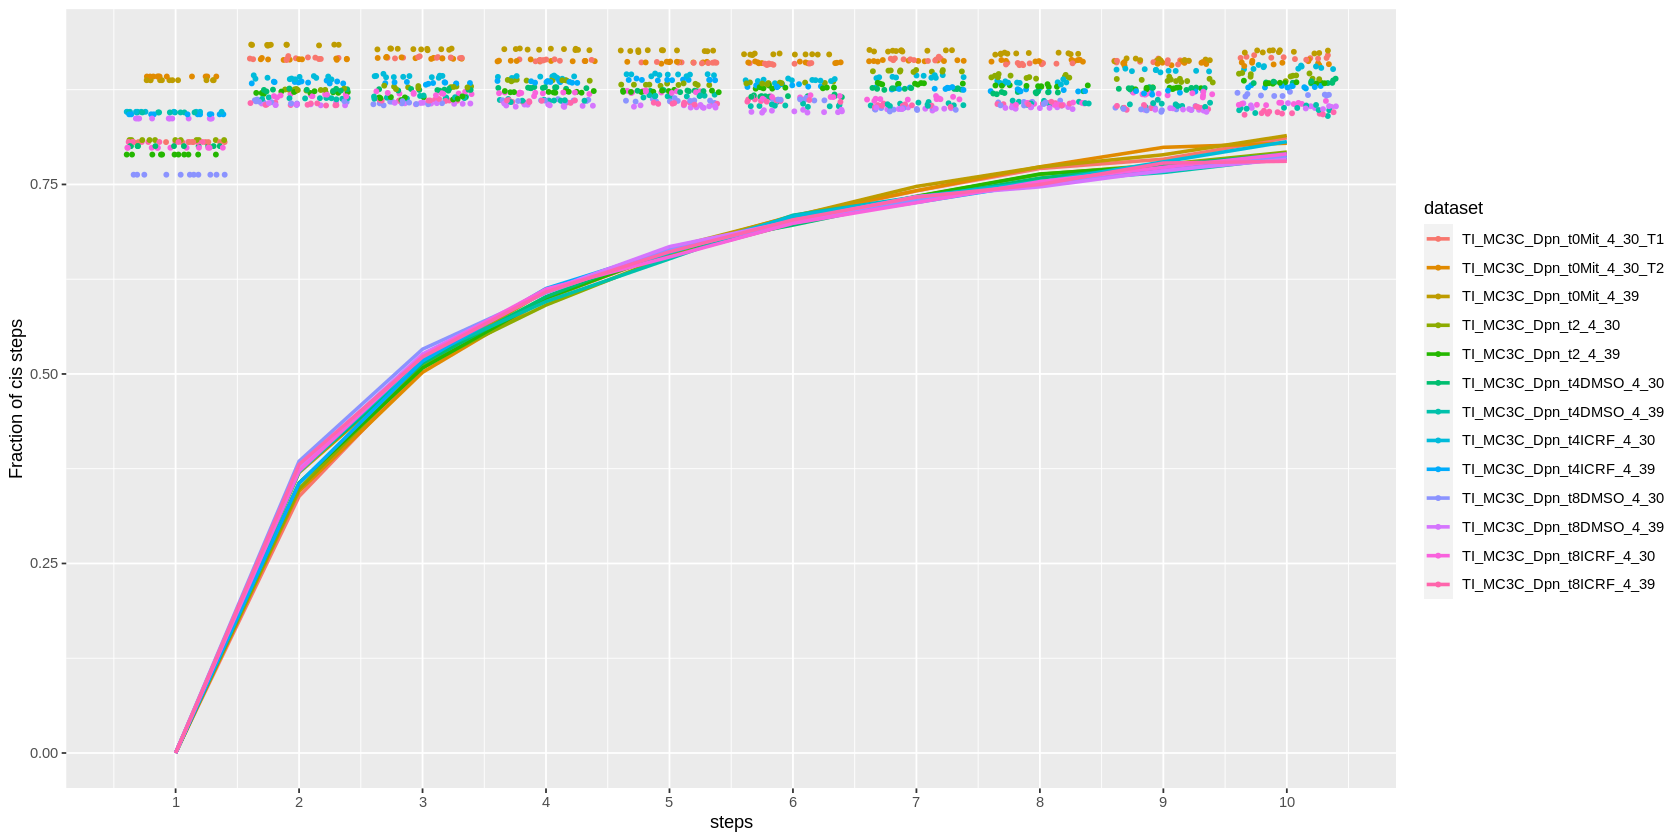

In [55]:
p <- ggplot(subset(permutations_info_per_step_by_dataset, steps <= 10),
            aes(x=steps, y=fraction_cis_hops, colour = dataset)) +
  geom_jitter(size = 1) +
  labs(y = "Fraction of cis steps") +
  scale_x_continuous(breaks = 0:10) +
  geom_line(data = subset(info_per_step_by_dataset, steps <= 10),
            mapping = aes(x=steps, y=fraction_cis_hops, colour = dataset),
            size = 1)
print(p)

`summarise()` regrouping output by 'iteration' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



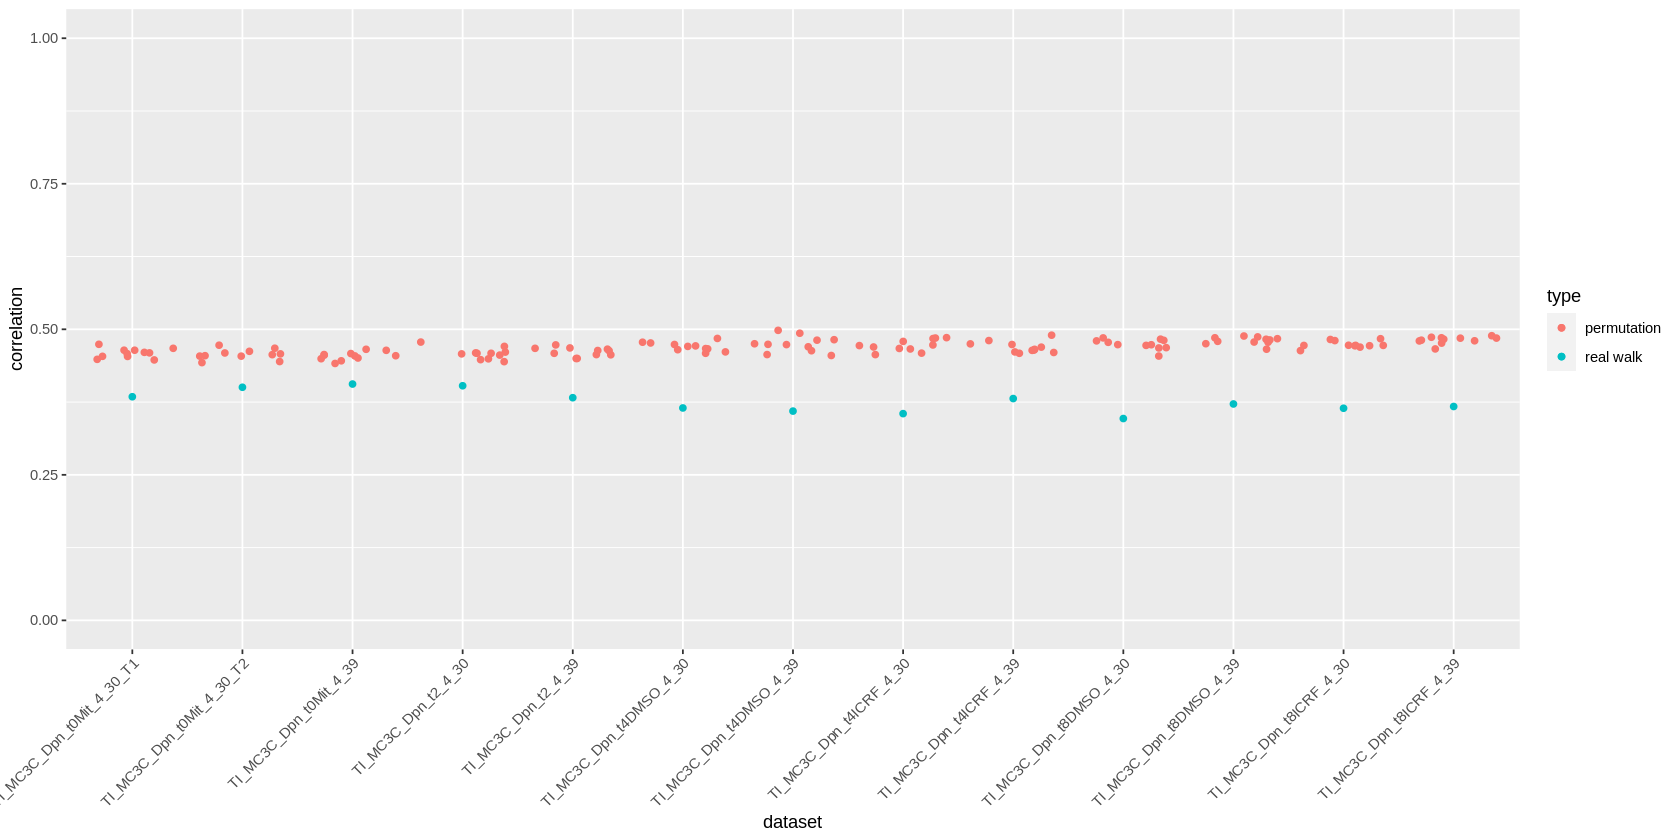

In [56]:
#Correlation between dist of each step and the next step

new_permutated_frame <- permutated_frame %>%
  filter(class != 3) %>%
  ungroup() %>%
  group_by(iteration, dataset, walk_id) %>%
  mutate(lead_dist = lead(dist), dist = dist,
         i_int_same_comp = first_frag_compartment_index == second_frag_compartment_index,
         i_plus_one_same_comp = lead(first_frag_compartment_index) == lead(second_frag_compartment_index),
         group = paste(i_int_same_comp, i_plus_one_same_comp))

new_direct_ints <- direct_ints %>%
  filter(class != 3) %>%
  ungroup() %>%
  group_by(dataset, pacbio_frag_ID) %>%
  mutate(lead_dist = lead(dist), dist = dist,
         i_int_same_comp = first_frag_compartment_index == second_frag_compartment_index,
         i_plus_one_same_comp = lead(first_frag_compartment_index) == lead(second_frag_compartment_index),
         group = paste(i_int_same_comp, i_plus_one_same_comp))

permutation_correlations <- new_permutated_frame %>%
  filter(class != 3) %>%
  ungroup() %>%
  group_by(iteration, dataset) %>%
  summarise(correlation = cor(abs(dist),
                              abs(lead_dist),
                              use="na.or.complete"))

real_walk_correlation <- new_direct_ints %>%
  filter(class != 3) %>%
  ungroup() %>%
  group_by(dataset) %>%
  summarise(correlation = cor(abs(dist), abs(lead_dist), use="na.or.complete"))

correlations <- rbind(mutate(real_walk_correlation, type = "real walk", iteration = "1") %>% as.data.frame(),
                      mutate(permutation_correlations, type = "permutation") %>% as.data.frame())

ggplot(mapping = aes(x=dataset, y = correlation, colour = type)) +
  geom_jitter(data = filter(correlations, type == "permutation")) +
  geom_point(data = filter(correlations, type == "real walk")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(limits=c(0, 1))

#Permutations are more evenly spaced than real walks

`summarise()` regrouping output by 'dataset', 'steps' (override with `.groups` argument)

`summarise()` regrouping output by 'dataset' (override with `.groups` argument)

`summarise()` regrouping output by 'iteration', 'dataset', 'steps' (override with `.groups` argument)

`summarise()` regrouping output by 'iteration', 'dataset' (override with `.groups` argument)

Warning message:
“Removed 1804 rows containing missing values (geom_point).”
Warning message:
“Removed 164 row(s) containing missing values (geom_path).”
Warning message:
“Removed 164 rows containing missing values (geom_point).”


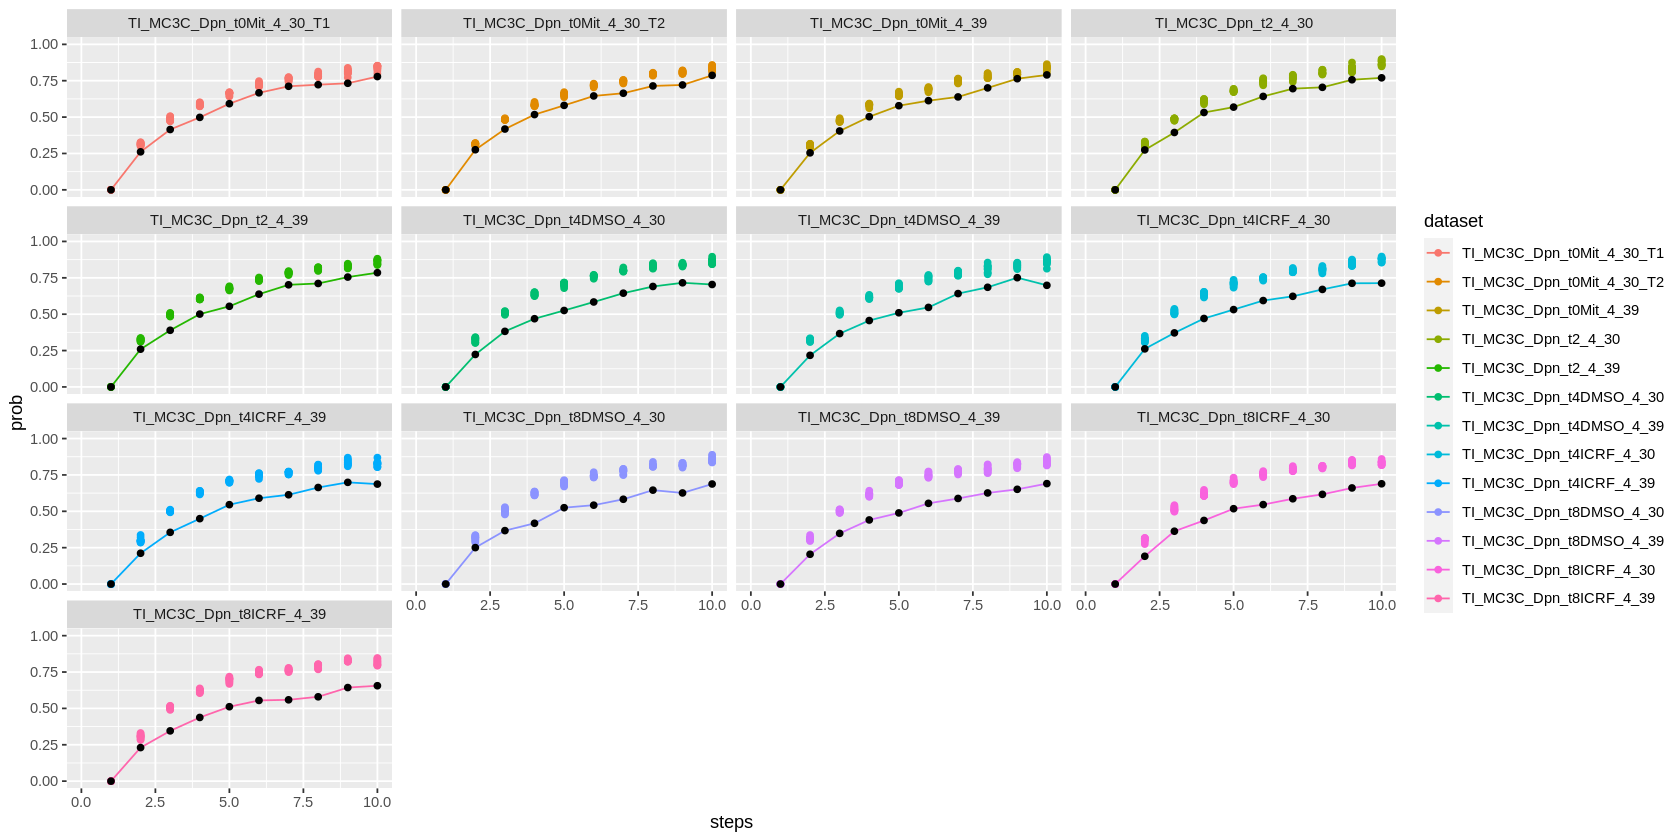

In [59]:
probabilities_real_walk <- direct_ints %>%
  filter(class != 3) %>%
  group_by(dataset, steps, pacbio_frag_ID) %>%
  transmute(long_int = abs(dist) >= 10e6) %>%
  summarise(two_or_more_long_ints = sum(long_int, na.rm=TRUE) >= 2, at_least_one_long_int = sum(long_int, na.rm=TRUE) >= 1) %>%
  group_by(dataset, steps) %>%
  summarise(prob = (sum(two_or_more_long_ints & at_least_one_long_int) / n()) / (sum(at_least_one_long_int)/n()))

probabilities_permutation <- permutated_frame %>%
  filter(class != 3) %>%
  group_by(iteration, dataset, steps, walk_id) %>%
  transmute(long_int = abs(dist) >= 10e6) %>%
  summarise(two_or_more_long_ints = sum(long_int, na.rm=TRUE) >= 2, at_least_one_long_int = sum(long_int, na.rm=TRUE) >= 1) %>%
  group_by(iteration, dataset, steps) %>%
  summarise(prob = (sum(two_or_more_long_ints & at_least_one_long_int) / n()) / (sum(at_least_one_long_int)/n()))

ggplot(mapping = aes(x = steps, y = prob, colour = dataset)) +
  geom_point(data = probabilities_permutation) +
  geom_line(data = probabilities_real_walk) +
  geom_point(data = probabilities_real_walk, colour = "black") +
  facet_wrap(~ dataset) + xlim(c(0,10))

#Probability of two or more long ints if at least one long int - depends on number of steps
#Permutations have higher prob than real, more so for G1 than mitotic. 

In [ ]:
save(permutated_frame, permutated_spacings_frame_try2,
     permutated_max_span_by_chr, permutated_steps_per_frag,
     permutated_scaling_frame, permutated_spacings_scaling_frame,
     new_permutated_frame, permutations_info_per_step_by_dataset,
     file = file.path(permuteDir, "210205_frames_for_plotting_permutated_10seeds_exp4.30and4.39_AllChromEigs.RData"))